<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:110%; font-family:Pacifico; background-color:#0073e6; overflow:hidden"><b> Machine learning - Alzheimer's Disease Diagnosis Prediction</b></div>

![](https://img.freepik.com/fotos-gratis/imagens-que-simulam-raios-x-com-cores-de-neon_23-2151521322.jpg?t=st=1724338149~exp=1724341749~hmac=21b8eed825903286563d5da67169498b000f3f75244bb61fe115d6a83db16a16&w=740)

# Part 1 - Business Problem: Alzheimer's Disease Diagnosis Prediction

**Context:**
Alzheimer's Disease (AD) is a progressive neurodegenerative condition that represents the most common cause of dementia among the elderly. Detection and recognition of Alzhemier's disease is something difficult to do and most times led to misdiagnoses of sickness or it is taken as another sickness thereby, living it in the body of the host for a very long period of time where the disease must have grown to a higher level beyond care. Researches made has made us realize that Alzheimer's disease has no cure yet but treatment and it is poorly characterized (Karl Herrup ,2023). Therefore, early detection of the disease can be of help in order to prevent it from growing to a higher level where it can no longer be treated. This model can be of a great help in the early detection of Alzheimer's disease in adopted places such as hospitals, clinics.etc.

**Objective:**
Develop a machine learning model to predict Alzheimer's diagnosis using demographic variables, lifestyle factors, medical history, and clinical and cognitive assessments. The model should identify patients at higher risk of developing Alzheimer's, enabling more effective screening and early interventions.


**Project Steps:**

1. **Data Exploration:**
   - Conduct exploratory data analysis to understand the distribution of variables and identify possible patterns or correlations with Alzheimer's diagnosis.
   - Check for missing data and apply appropriate treatment.

2. **Data Preprocessing:**
   - Normalize or standardize continuous variables (e.g., age, BMI).
   - Encode categorical variables (e.g., gender, ethnicity).
   - Handle outliers and fill missing values.

3. **Data Splitting:**
   - Split the dataset into training and testing sets, ensuring the test set is representative of the population.

4. **Model Selection:**
   - Test different machine learning algorithms, such as Logistic Regression, Random Forest, Support Vector Machines (SVM), and Ensemble algorithms.
   - Use cross-validation techniques to assess model performance.

5. **Model Evaluation:**
   - Evaluate model performance using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.
   - Analyze feature importance to understand which factors are most predictive of Alzheimer's diagnosis.

6. **Implementation and Interpretation:**
   - Implement the final model and generate predictions for new data.
   - Interpret the results and identify potential clinical applications for the model.

**Expected Outcomes:**
- A robust machine learning model capable of accurately predicting Alzheimer's diagnosis.
- Insights into the key risk factors associated with Alzheimer's development.
- A support tool for clinicians to identify at-risk patients early, allowing for more effective interventions.

This project will not only enable the creation of a useful predictive model but also deepen the understanding of the factors contributing to the development of Alzheimer's Disease, providing a solid foundation for future research and clinical applications.

In [1]:
!pip install watermar
!pip install shap
!pip install xgboost

ERROR: Could not find a version that satisfies the requirement watermar (from versions: none)
ERROR: No matching distribution found for watermar
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 12.2 MB/s eta 0:00:00


In [2]:
# This Python 3 environment (which come with Anaconda) comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

In [3]:
# !pip install numpy --upgrade
# !pip install pandas --upgrade
!pip install watermark

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [4]:
# System libraries
import re
import os
import unicodedata
import itertools

# Library for file manipulation
import pandas as pd
import numpy as np
import pandas

# Data visualization
import plotly
import seaborn as sns
import matplotlib.pylab as pl
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import pyplot as plt
from IPython.display import SVG

# Configuration for graphs width and layout of graphs
sns.set_theme(style='whitegrid')
palette='viridis'

# Warnings remove warnings
import warnings
warnings.filterwarnings("ignore")

# Python version
from platform import python_version
print('Python version in this Jupyter Notebook:', python_version())

# Load library versions
import watermark

# Library versions
%reload_ext watermark
%watermark -a "Library versions" --iversions

Python version in this Jupyter Notebook: 3.10.12
Author: Library versions

seaborn   : 0.13.1
pandas    : 2.1.4
matplotlib: 3.7.1
watermark : 2.4.3
numpy     : 1.26.4
plotly    : 5.15.0
re        : 2.2.1



# Part 2 - Database

**Variables Used:**
- **Demographic Variables:**
  - `Age`
  - `Gender`
  - `Ethnicity`
  - `EducationLevel`

- **Lifestyle Factors:**
  - `BMI` (Body Mass Index)
  - `Smoking`
  - `AlcoholConsumption`
  - `PhysicalActivity`
  - `DietQuality`
  - `SleepQuality`

- **Medical History:**
  - `FamilyHistoryAlzheimers`
  - `CardiovascularDisease`
  - `Diabetes`
  - `Depression`
  - `HeadInjury`
  - `Hypertension`

- **Clinical Measurements:**
  - `SystolicBP`
  - `DiastolicBP`
  - `CholesterolTotal`
  - `CholesterolLDL`
  - `CholesterolHDL`
  - `CholesterolTriglycerides`

- **Cognitive and Functional Assessments:**
  - `MMSE` (Mini-Mental State Examination score)
  - `FunctionalAssessment`
  - `MemoryComplaints`
  - `BehavioralProblems`
  - `ADL` (Activities of Daily Living score)

- **Target Variable:**
  - `Diagnosis` (Alzheimer's Diagnosis, where 0 indicates no Alzheimer's and 1 indicates Alzheimer's)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
# Set the display.max_columns option to None
pd.set_option('display.max_columns', None)

# Database
df = pd.read_csv("/content/drive/MyDrive/Jobs/Mr Dayo/ALZHEIMER DISEASE/alzheimers_disease_data.csv")
df

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0          4751   73       0          0               2  22.927749        0   
1          4752   89       0          0               0  26.827681        0   
2          4753   73       0          3               1  17.795882        0   
3          4754   74       1          0               1  33.800817        1   
4          4755   89       0          0               0  20.716974        0   
...         ...  ...     ...        ...             ...        ...      ...   
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0              13.297218          6.327112     1.347214      9.025679   
1               4.542524          7.619885     0.518767      7.151293   
2              19.555085          7.844988     1.826335      9.673574   
3              12.209266          8.428001     7.435604      8.392554   
4              18.454356          6.310461     0.795498      5.597238   
...                  ...               ...          ...           ...   
2144            1.561126          4.049964     6.555306      7.535540   
2145           18.767261          1.360667     2.904662      8.555256   
2146            4.594670          9.886002     8.120025      5.769464   
2147            8.674505          6.354282     1.263427      8.322874   
2148            7.890703          6.570993     7.941404      9.878711   

      FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                           0                      0         1           1   
1                           0                      0         0           0   
2                           1                      0         0           0   
3                           0                      0         0           0   
4                           0                      0         0           0   
...                       ...                    ...       ...         ...   
2144                        0                      0         0           0   
2145                        0                      0         0           0   
2146                        0                      0         0           0   
2147                        0                      1         0           0   
2148                        0                      0         0           0   

      HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0              0             0         142           72        242.366840   
1              0             0         115           64        231.162595   
2              0             0          99          116        284.181858   
3              0             0         118          115        159.582240   
4              0             0          94          117        237.602184   
...          ...           ...         ...          ...               ...   
2144           0             0         122          101        280.476824   
2145           0             0         152          106        186.384436   
2146           0             0         115          118        237.024558   
2147           0             0         103           96        242.197192   
2148           0             0         166           78        283.396797   

      CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
0          56.150897       33.682563                162.189143  21.463532   
1         193.407996       79.028477                294.630909  20.613267   
2         153.322762       69.772292                 83.638324   7.356249   
3         

In [49]:
# Viewing the first 5 data
df.head()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0       4751   73       0          0               2  22.927749        0   
1       4752   89       0          0               0  26.827681        0   
2       4753   73       0          3               1  17.795882        0   
3       4754   74       1          0               1  33.800817        1   
4       4755   89       0          0               0  20.716974        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0           13.297218          6.327112     1.347214      9.025679   
1            4.542524          7.619885     0.518767      7.151293   
2           19.555085          7.844988     1.826335      9.673574   
3           12.209266          8.428001     7.435604      8.392554   
4           18.454356          6.310461     0.795498      5.597238   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
1                        0                      0         0           0   
2                        1                      0         0           0   
3                        0                      0         0           0   
4                        0                      0         0           0   

   HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0           0             0         142           72        242.366840   
1           0             0         115           64        231.162595   
2           0             0          99          116        284.181858   
3           0             0         118          115        159.582240   
4           0             0          94          117        237.602184   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
0       56.150897       33.682563                162.189143  21.463532   
1      193.407996       79.028477                294.630909  20.613267   
2      153.322762       69.772292                 83.638324   7.356249   
3       65.366637       68.457491                277.577358  13.991127   
4       92.869700       56.874305                291.198780  13.517609   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              6.518877                 0                   0  1.725883   
1              7.118696                 0                   0  2.592424   
2              5.895077                 0                   0  7.119548   
3              8.965106                 0                   1  6.481226   
4              6.045039                 0                   0  0.014691   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  Diagnosis DoctorInCharge  
0              0          0      XXXConfid  
1              1          0      XXXConfid  
2              0          0      XXXConfid  
3              0          0      XXXConfid  
4              0          0      XXXConfid

In [50]:
# Viewing the last 5 data
df.tail()

PatientID  Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
2144       6895   61       0          0               1  39.121757        0   
2145       6896   75       0          0               2  17.857903        0   
2146       6897   77       0          0               1  15.476479        0   
2147       6898   78       1          3               1  15.299911        0   
2148       6899   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
2144            1.561126          4.049964     6.555306      7.535540   
2145           18.767261          1.360667     2.904662      8.555256   
2146            4.594670          9.886002     8.120025      5.769464   
2147            8.674505          6.354282     1.263427      8.322874   
2148            7.890703          6.570993     7.941404      9.878711   

      FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
2144                        0                      0         0           0   
2145                        0                      0         0           0   
2146                        0                      0         0           0   
2147                        0                      1         0           0   
2148                        0                      0         0           0   

      HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
2144           0             0         122          101        280.476824   
2145           0             0         152          106        186.384436   
2146           0             0         115          118        237.024558   
2147           0             0         103           96        242.197192   
2148           0             0         166           78        283.396797   

      CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
2144       94.870490       60.943092                234.520123   1.201190   
2145       95.410700       93.649735                367.986877   6.458060   
2146      156.267294       99.678209                294.802338  17.011003   
2147       52.482961       81.281111                145.253746   4.030491   
2148       92.200064       81.920043                217.396873  11.114777   

      FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
2144              0.238667                 0                   0  4.492838   
2145              8.687480                 0                   1  9.204952   
2146              1.972137                 0                   0  5.036334   
2147              5.173891                 0                   0  3.785399   
2148              6.307543                 0                   1  8.327563   

      Confusion  Disorientation  PersonalityChanges  \
2144          1               0                   0   
2145          0               0                   0   
2146          0               0                   0   
2147          0               0                   0   
2148          0               1                   0   

      DifficultyCompletingTasks  Forgetfulness  Diagnosis DoctorInCharge  
2144                          0              0          1      XXXConfid  
2145                          0              0          1      XXXConfid  
2146                          0              0          1      XXXConfid  
2147                          0              1          1      XXXConfid  
2148                          0              1          0      XXXConfid

In [51]:
# Rows and columns of the data

df.shape

(2149, 35)

In [52]:
# Data info: This gives a summary on the data type per column, number of entries per column and the index range
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

# Part 3) Exploratory data analysis

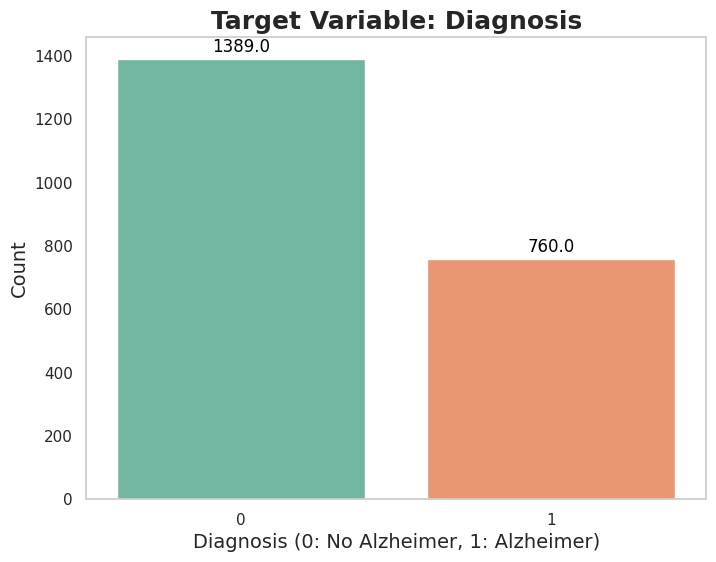

In [53]:
# Create a count plot for the Diagnosis variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Diagnosis', data=df, palette='Set2')

# Adding title and labels with enhanced formatting
plt.title('Target Variable: Diagnosis', fontsize=18, fontweight='bold')
plt.xlabel('Diagnosis (0: No Alzheimer, 1: Alzheimer)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding count numbers on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                       textcoords='offset points')

# Display the plot
plt.grid(False)
plt.show()

**Analysis**

### Analysis of the Target Variable: Diagnosis Count Plot

The provided count plot visualizes the distribution of the `Diagnosis` variable, which indicates whether a patient has been diagnosed with Alzheimer's (1) or not (0).

#### Key Observations:

1. **Class Distribution**:
   - **No Alzheimer (0)**: The plot shows that 1,389 patients in the dataset do not have Alzheimer's disease.
   - **Alzheimer (1)**: The plot indicates that 760 patients have been diagnosed with Alzheimer's disease.

2. **Class Imbalance**:
   - The dataset shows a noticeable class imbalance. There are significantly more patients without Alzheimer's (1,389) compared to those with Alzheimer's (760). This imbalance could potentially impact any predictive models built on this data, as most models assume a roughly equal distribution of classes.
   - When training machine learning models, you may need to consider techniques like oversampling the minority class (e.g., using SMOTE) or applying class weighting to handle this imbalance effectively.

3. **Visualization Elements**:
   - **Annotations**: The exact counts are displayed on top of each bar, making it easy to see the number of instances in each category.
   - **Color Coding**: The bars are color-coded with different shades, improving the visual distinction between the two classes.
   - **Labels and Title**: The x-axis is clearly labeled to explain what the `0` and `1` values represent, and the plot title effectively describes the variable being visualized.

#### Next Steps:

- **Modeling Considerations**: If you plan to use this data to train a predictive model, it’s important to account for the class imbalance. Techniques such as resampling, using balanced accuracy as a metric, or applying class weights in algorithms like logistic regression or decision trees can help mitigate potential bias toward the majority class.
- **Further Exploration**: Consider exploring the relationships between `Diagnosis` and other variables in the dataset. For example, you might want to look at how factors like age, lifestyle habits, or medical history correlate with the likelihood of an Alzheimer's diagnosis.

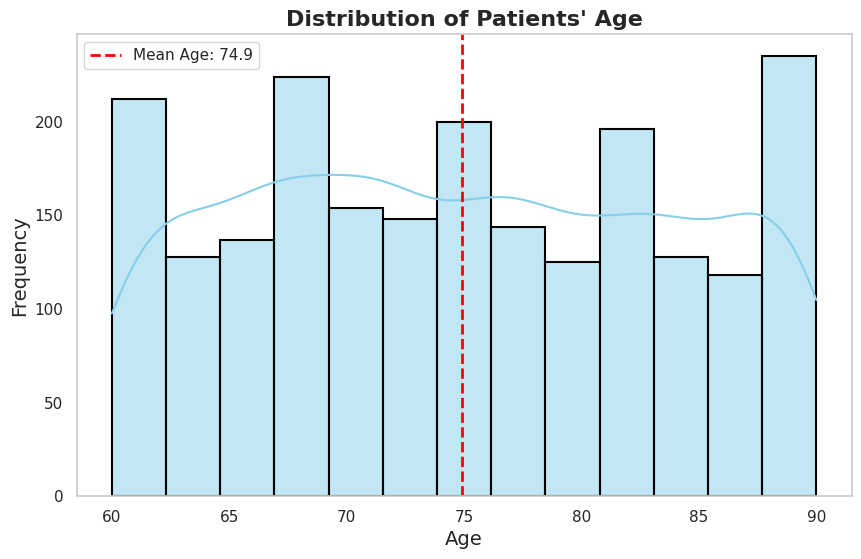

In [54]:
# Create a histogram with KDE (Kernel Density Estimate) for the Age distribution
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
sns.histplot(df['Age'], kde=True, color='skyblue', edgecolor='black', linewidth=1.5)

# Add title and labels with improved formatting
plt.title('Distribution of Patients\' Age', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Highlight the mean age with a vertical line
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.1f}')

# Add a legend for the mean age line
plt.legend()

# Display the plot
plt.grid(False)
plt.show()

**Analysis**

### Analysis of the Age Distribution Plot

The provided histogram visualizes the distribution of patient ages in the dataset, along with the mean age indicated by a vertical red dashed line.

#### Key Observations:

1. **Age Distribution**:
   - The age distribution appears relatively uniform, with patients spread across the age range from 60 to 90 years.
   - There are several age groups with slightly higher frequencies, particularly at ages 60, 68, 70, 75, and 90, as indicated by the taller bars.

2. **Mean Age**:
   - **Mean Age Line**: The mean age of the patients is 74.9 years, as marked by the vertical red dashed line. This line provides a reference point to understand where the central tendency of the ages lies in relation to the overall distribution.
   - The mean age is slightly closer to the middle of the age range, suggesting that the dataset might be slightly skewed towards the younger or older end, but not significantly.

3. **KDE (Kernel Density Estimate)**:
   - The light blue KDE line provides a smoothed estimate of the distribution, giving an overall shape to the age distribution that is easier to interpret than the raw histogram alone.
   - The KDE suggests a relatively flat distribution with small peaks around the ages of 70 and 90.

4. **Visual Enhancements**:
   - **Color and Clarity**: The histogram bars are colored in light blue with a black edge, which clearly defines each age group. The red dashed line contrasts well with the blue bars, making the mean age easily noticeable.
   - **Legend**: The legend indicates the mean age, providing context directly within the plot without needing to refer to external information.

#### Implications:

- **Balanced Age Distribution**: The relatively even distribution across different age groups suggests that any analysis or modeling will not be overly biased by any particular age group. However, the presence of peaks at certain ages may still warrant further investigation to understand if these peaks are related to other variables in the dataset.
  
- **Consideration in Modeling**: Given that age is likely a critical factor in Alzheimer's research, the presence of the mean age and the distribution should be carefully considered in any predictive modeling, especially when analyzing age as a feature.

#### Next Steps:

- **Stratified Analysis**: It may be beneficial to stratify further analyses by age groups, especially around the peaks and troughs of the distribution, to see if there are specific patterns associated with certain age ranges.
- **Comparison Across Groups**: Consider comparing this age distribution between those diagnosed with Alzheimer's and those who are not to see if there are any significant differences in age profiles between the groups.

This analysis of the age distribution plot helps in understanding the demographic makeup of the dataset, providing insights that are crucial for further analysis and modeling efforts.

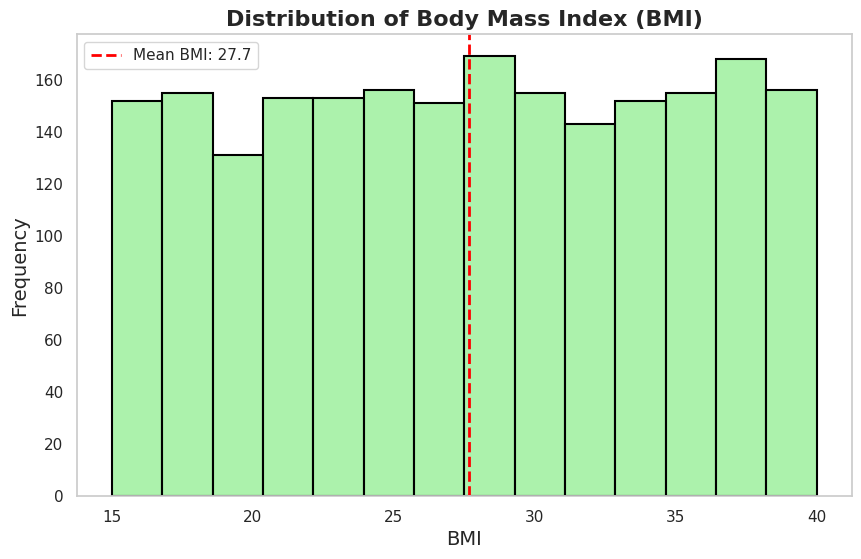

In [55]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a histogram with KDE (Kernel Density Estimate) for the BMI distribution
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
sns.histplot(df['BMI'], kde=False, color='lightgreen', edgecolor='black', linewidth=1.5)

# Add title and labels with improved formatting
plt.title('Distribution of Body Mass Index (BMI)', fontsize=16, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Highlight the mean BMI with a vertical line
mean_bmi = df['BMI'].mean()
plt.axvline(mean_bmi, color='red', linestyle='--', linewidth=2, label=f'Mean BMI: {mean_bmi:.1f}')

# Add a legend for the mean BMI line
plt.legend()

# Display the plot
plt.grid(False)
plt.show()

**Analysis**

### Analysis of the BMI Distribution Plot

The provided histogram visualizes the distribution of Body Mass Index (BMI) in the dataset, with a red dashed line indicating the mean BMI.

#### Key Observations:

1. **BMI Distribution**:
   - The BMI values in the dataset range from around 15 to 40, indicating a wide variation in body mass among the patients.
   - The distribution appears relatively uniform, with no single BMI category overwhelmingly dominant. Each bin has a roughly similar frequency, although there is a slight concentration of individuals around the mean BMI.

2. **Mean BMI**:
   - **Mean BMI Line**: The mean BMI of the patients is 27.7, as marked by the vertical red dashed line. This is slightly above the midpoint of the BMI range, suggesting that the average patient in this dataset falls into the overweight category, according to general BMI classifications.
   - The mean line is placed centrally within the distribution, indicating that the BMI values are symmetrically spread around the mean.

3. **Visual Enhancements**:
   - **Color and Clarity**: The histogram bars are colored in lightgreen with a black edge, clearly defining each BMI category. The red dashed line contrasts well with the green bars, making the mean BMI easily noticeable.
   - **Legend**: The legend specifies the mean BMI, providing direct reference within the plot.

#### Implications:

- **Balanced BMI Distribution**: The relatively even distribution across different BMI ranges suggests that any analysis or modeling will not be overly biased by any particular BMI category. However, since BMI is a key indicator of health, its distribution should be considered carefully in any health-related analysis, particularly in relation to conditions like Alzheimer's.
  
- **Consideration in Modeling**: Given that BMI is often related to various health outcomes, this balanced distribution should be factored into any predictive modeling efforts. The presence of a clear mean also suggests a potential threshold around which health outcomes may vary.

#### Next Steps:

- **Stratified Analysis**: It may be beneficial to stratify further analyses by BMI categories to see if there are any specific health outcomes or conditions more prevalent in certain BMI ranges.
- **Comparative Analysis**: Consider comparing this BMI distribution between different subgroups, such as those with and without Alzheimer's, to identify any significant differences or patterns.

This analysis of the BMI distribution plot helps in understanding the body mass characteristics of the patient population in the dataset, providing insights that are crucial for further analysis and potential health-related investigations.

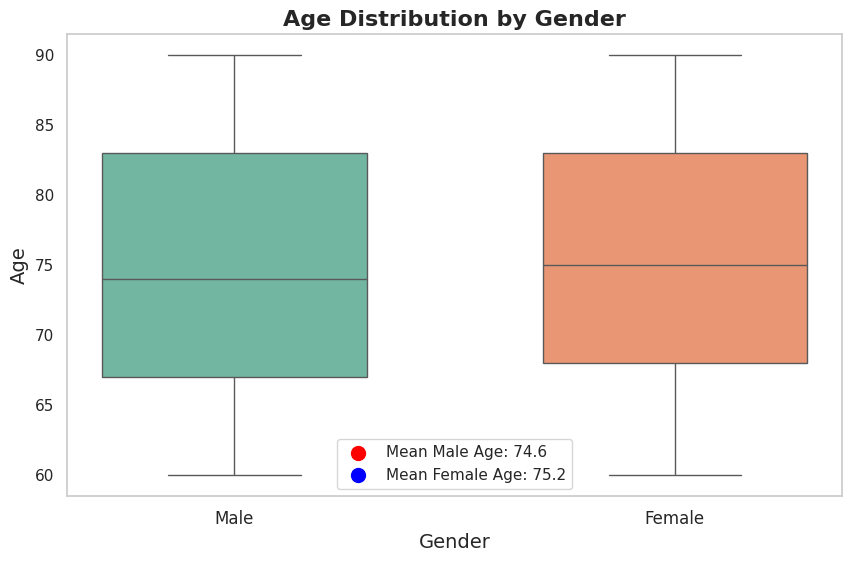

In [56]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a boxplot for Age by Gender
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
sns.boxplot(x='Gender', y='Age', data=df, palette='Set2', width=0.6)

# Add title and labels with improved formatting
plt.title('Age Distribution by Gender', fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Age', fontsize=14)

# Set custom labels for Gender if 0 is Male and 1 is Female
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)

# Add mean values as points on the boxplot
mean_male_age = df[df['Gender'] == 0]['Age'].mean()
mean_female_age = df[df['Gender'] == 1]['Age'].mean()

plt.scatter([0], [mean_male_age], color='red', s=100, label=f'Mean Male Age: {mean_male_age:.1f}')
plt.scatter([1], [mean_female_age], color='blue', s=100, label=f'Mean Female Age: {mean_female_age:.1f}')

# Add a legend
plt.legend()

# Display the plot
plt.grid(False)
plt.show()

**Analysis**

### Analysis of the Age Distribution by Gender Boxplot

The provided boxplot visualizes the distribution of age among male and female patients, with mean ages marked by colored points (red for males and blue for females).

#### Key Observations:

1. **Age Distribution**:
   - The boxplot shows that both male and female patients have a wide age range, from around 60 to 90 years.
   - The interquartile range (IQR) for both genders is similar, with the middle 50% of ages falling between approximately 70 and 80 years for males, and slightly broader for females.

2. **Mean Age**:
   - **Mean Male Age**: The mean age for male patients is 74.6 years, indicated by a red dot. This is very close to the median age for males, which suggests a relatively symmetrical distribution of ages.
   - **Mean Female Age**: The mean age for female patients is slightly higher at 75.2 years, indicated by a blue dot. This is also close to the median for females, showing a similar symmetry in the age distribution.

3. **Gender Comparison**:
   - The boxplot reveals that the age distribution for both genders is quite similar, with no significant differences between male and female patients in terms of age.
   - Both genders have the same range, from 60 to 90 years, indicating that the dataset includes a balanced representation of age across genders.

4. **Visual Enhancements**:
   - **Colored Points**: The use of colored points (red for males and blue for females) to mark the mean age makes it easy to see where the average age lies within the distribution.
   - **Legend**: The legend clearly explains the meaning of the colored points, providing context directly within the plot.

#### Implications:

- **Age and Gender Analysis**: The similarity in age distribution between males and females suggests that gender may not play a significant role in age differences within this patient population. However, further analysis could explore whether age interacts differently with other variables across genders.
  
- **Symmetry in Distribution**: The close alignment between the mean and median ages for both genders indicates a symmetric distribution of ages, which could be useful when applying statistical models that assume normality.

#### Next Steps:

- **Further Stratification**: Consider exploring whether age interacts differently with Alzheimer's diagnosis when stratified by gender. This could involve creating separate age distribution plots for males and females based on their diagnosis status.
- **Incorporating Additional Variables**: Analyze how age distribution interacts with other variables, such as BMI, lifestyle factors, or medical history, to uncover any underlying patterns that may be relevant to gender-specific health outcomes.

This analysis of the age distribution by gender helps in understanding the demographic characteristics of the patient population, providing insights that are crucial for more detailed exploratory analysis and subsequent modeling.

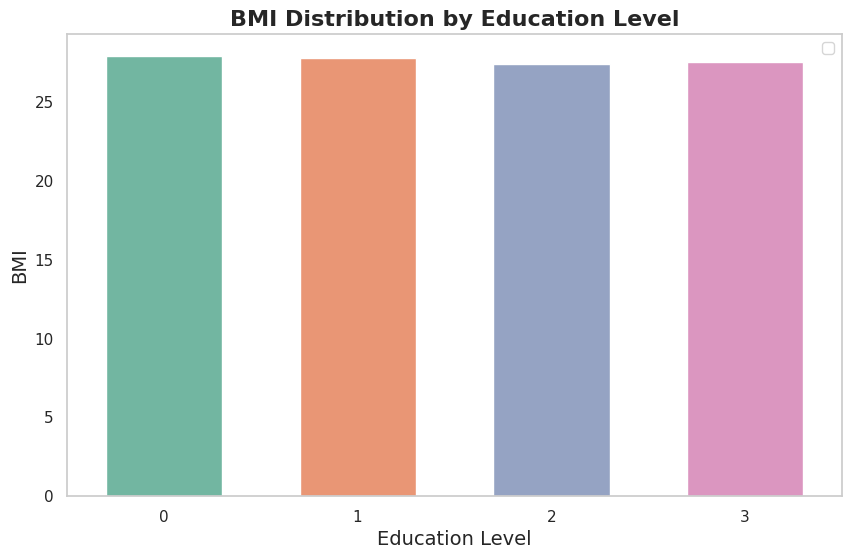

In [57]:
# Set the style of the plot
sns.set(style="whitegrid")

# Create a boxplot for BMI by Education Level
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
sns.barplot(x='EducationLevel', y='BMI', ci=None, data=df, palette='Set2', width=0.6)

# Add title and labels with improved formatting
plt.title('BMI Distribution by Education Level', fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('BMI', fontsize=14)


# Add a legend (only once to avoid duplication)
plt.legend()

# Display the plot
plt.grid(False)
plt.show()

**Analysis**

### Analysis of the BMI Distribution by Education Level Bar Plot

The provided bar plot visualizes the distribution of BMI (Body Mass Index) across different education levels.

#### Key Observations:

1. **BMI and Education Level**:
   - The plot shows the mean BMI for each education level category.
   - The categories for education level are coded as follows:
     - `0`: None
     - `1`: High School
     - `2`: Bachelor's
     - `3`: Higher (Postgraduate or equivalent)

2. **Mean BMI Across Education Levels**:
   - The mean BMI values across the different education levels appear to be fairly consistent, with little variation between them.
   - This consistency suggests that BMI does not vary significantly based on education level within this dataset.

3. **Visual Enhancements**:
   - **Color Coding**: Each bar is color-coded, but there seems to be an issue where the legend is not displaying properly. The plot lacks the legend indicating which color corresponds to which education level, which might lead to some confusion.
   - **Clear Labels**: The x-axis is labeled "Education Level," and the y-axis is labeled "BMI," clearly indicating what is being compared.

#### Implications:

- **Limited Variation**: The minimal variation in BMI across education levels suggests that education may not be a significant factor in determining BMI in this dataset. However, this should be confirmed with further statistical analysis.
  
- **Further Analysis**: It may be worthwhile to explore other factors, such as income, lifestyle choices, or access to healthcare, that might interact with education level to influence BMI.

#### Next Steps:

- **Adding a Legend**: Consider adding or correcting the legend to ensure that the colors representing each education level are clearly indicated. This will enhance the interpretability of the plot.
- **Statistical Testing**: Conduct a statistical test (e.g., ANOVA) to determine if there are any statistically significant differences in BMI across education levels.
- **Exploring Other Variables**: Explore how other variables, such as physical activity or diet quality, interact with both BMI and education level to provide a more comprehensive analysis.

This analysis of the BMI distribution by education level helps in understanding whether education plays a role in the BMI of the patients in this dataset, providing insights that could guide further investigation.

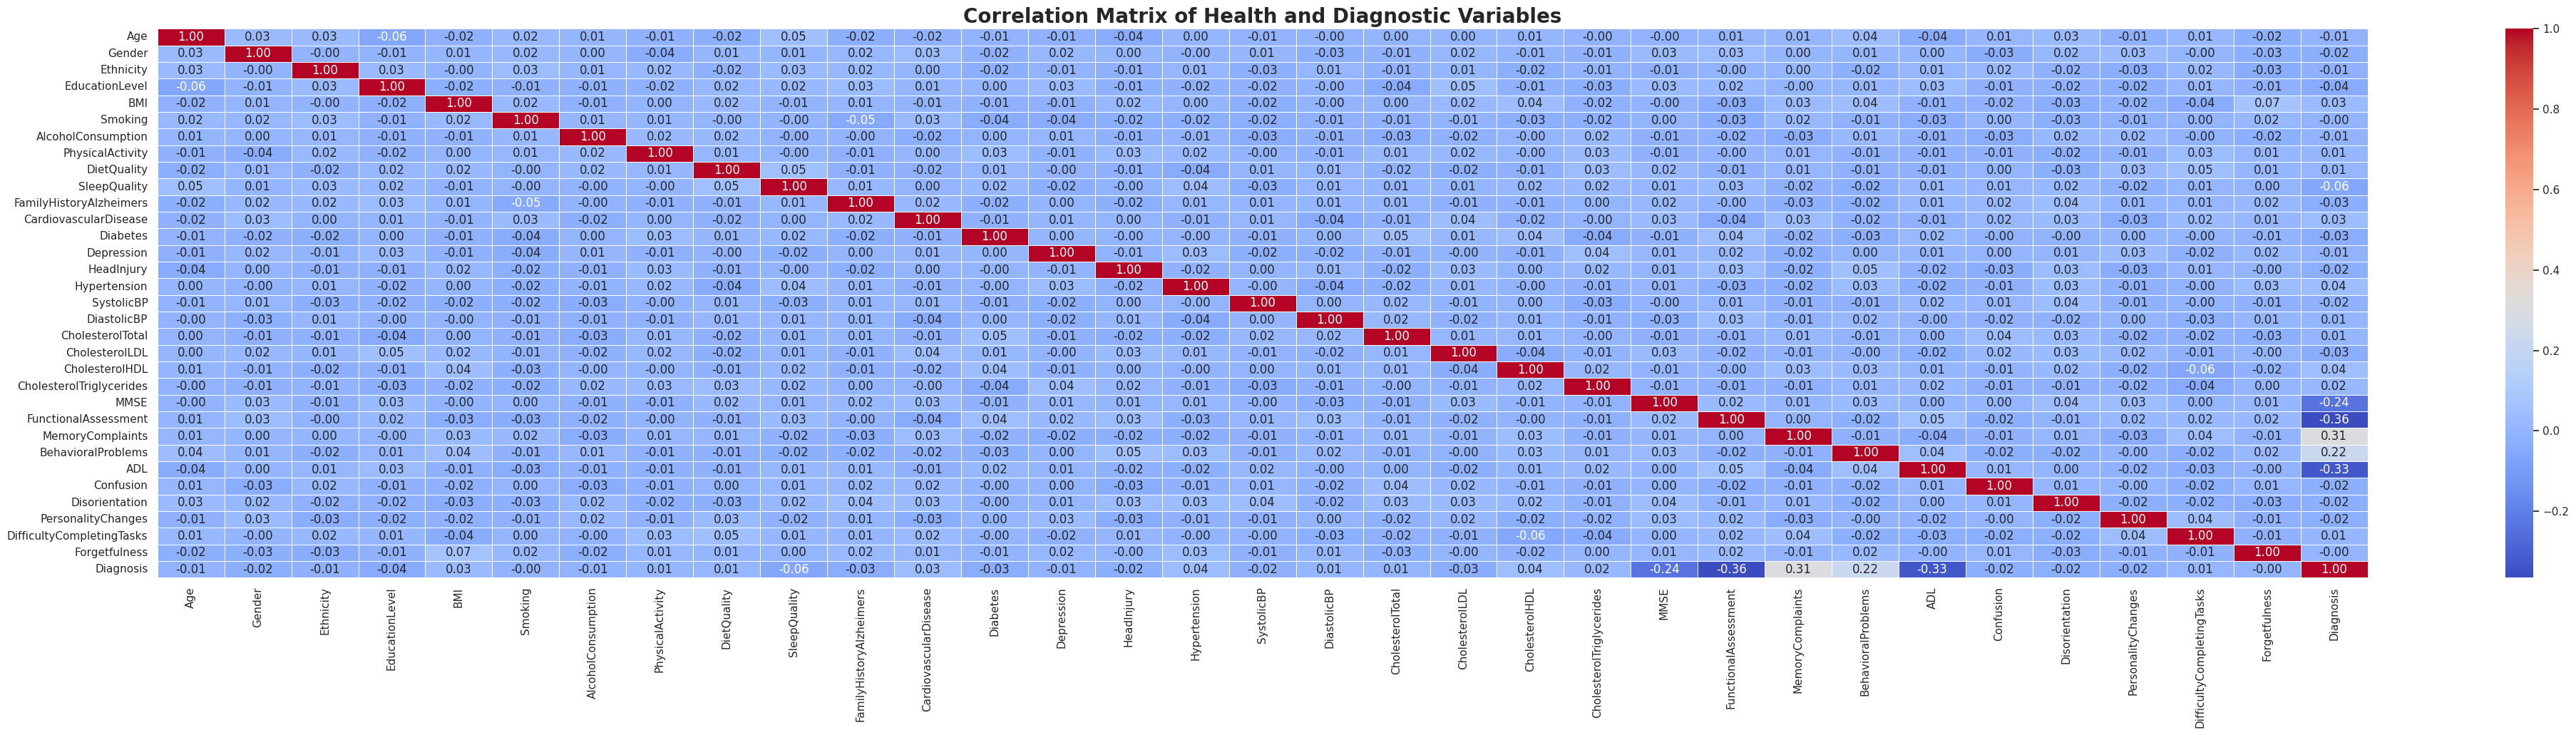

In [58]:
# Set a more appropriate figure size for readability
plt.figure(figsize=(50, 10))

# Calculate the correlation matrix
corr_matrix = df[["Age", "Gender", "Ethnicity", "EducationLevel", "BMI", "Smoking",
                  "AlcoholConsumption", "PhysicalActivity", "DietQuality", "SleepQuality",
                  "FamilyHistoryAlzheimers", "CardiovascularDisease", "Diabetes", "Depression",
                  "HeadInjury", "Hypertension", "SystolicBP", "DiastolicBP", "CholesterolTotal",
                  "CholesterolLDL", "CholesterolHDL", "CholesterolTriglycerides", "MMSE",
                  "FunctionalAssessment", "MemoryComplaints", "BehavioralProblems", "ADL",
                  "Confusion", "Disorientation", "PersonalityChanges", "DifficultyCompletingTasks",
                  "Forgetfulness", "Diagnosis"]].corr()

# Create the heatmap with improved formatting
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add the title with improved formatting
plt.title('Correlation Matrix of Health and Diagnostic Variables', fontsize=20, fontweight='bold')

# Display the plot
plt.grid(False)
plt.show()

### Analysis of the Updated Correlation Matrix of Health and Diagnostic Variables

The correlation matrix provided offers an in-depth look at the linear relationships between various health and diagnostic variables. Each cell contains the Pearson correlation coefficient, representing the degree of linear relationship between two variables.

#### Key Insights:

1. **Strongest Correlations**:
   - **MMSE and Functional Assessment (-0.36)**: The correlation between MMSE (Mini-Mental State Examination) and Functional Assessment is the most significant negative correlation in the matrix. This indicates that as MMSE scores (cognitive function) decrease, Functional Assessment scores (functional abilities) also tend to decrease, which makes sense in a clinical context where cognitive decline often accompanies reduced functionality.
   - **MMSE and Diagnosis (-0.33)**: Another strong negative correlation is observed between MMSE scores and Alzheimer's Diagnosis, indicating that lower MMSE scores are strongly associated with a higher likelihood of an Alzheimer's diagnosis.

2. **Moderate to Low Correlations**:
   - **Functional Assessment and Diagnosis (-0.31)**: The negative correlation between Functional Assessment and Diagnosis suggests that patients with lower functional abilities are more likely to be diagnosed with Alzheimer's.
   - **Memory Complaints and Diagnosis (0.31)**: There is a moderate positive correlation between Memory Complaints and Alzheimer's Diagnosis. This suggests that patients reporting more memory complaints are more likely to be diagnosed with Alzheimer's.

3. **Weak or Insignificant Correlations**:
   - Many variables, such as Age, Gender, and Ethnicity, show weak correlations with most other variables. For instance, Age has very low correlations across the board, indicating that it may not be a significant predictor on its own for most of the health outcomes in this dataset.
   - **Cholesterol Levels**: Various cholesterol measures (Total, LDL, HDL, Triglycerides) show very weak correlations with most other variables, suggesting that cholesterol levels may not be strongly linked to cognitive or functional assessments in this dataset.

4. **Multicollinearity Considerations**:
   - **Cholesterol Measures**: Cholesterol LDL and HDL levels show some correlation with each other, as expected since these are different aspects of cholesterol. However, the correlations are not strong enough to suggest severe multicollinearity concerns.
   - **Physical Activity and Diet Quality**: These two variables have a low correlation (0.02), indicating that they measure relatively independent aspects of health.

#### Implications for Analysis:

- **Feature Selection**: Variables like MMSE, Functional Assessment, and Memory Complaints should be considered key features for predicting Alzheimer's Diagnosis due to their relatively stronger correlations. Conversely, variables with low correlations to the target variable (Diagnosis) might be less useful for prediction and could be candidates for exclusion or require feature engineering to enhance their predictive power.
  
- **Model Interpretation**: When using linear models or those sensitive to multicollinearity, it's essential to account for these correlations to avoid distorted interpretations of the model coefficients.

- **Further Investigation**: The weak correlations for many variables suggest that non-linear relationships or interactions might be present, which could be explored using more advanced modeling techniques, such as non-linear models or interaction terms.

#### Next Steps:

1. **Advanced Modeling**: Consider using machine learning models that can handle complex interactions and non-linear relationships, such as decision trees, random forests, or gradient boosting machines.
   
2. **Exploratory Data Analysis (EDA)**: Further exploratory analysis can help uncover potential non-linear patterns or interactions that aren't evident in this linear correlation matrix.

3. **Dimensionality Reduction**: Techniques like Principal Component Analysis (PCA) could be employed to reduce the dimensionality of the data if multicollinearity becomes a significant concern.

This detailed analysis of the correlation matrix provides a comprehensive understanding of the relationships between the health and diagnostic variables in your dataset, guiding both feature selection and model development.

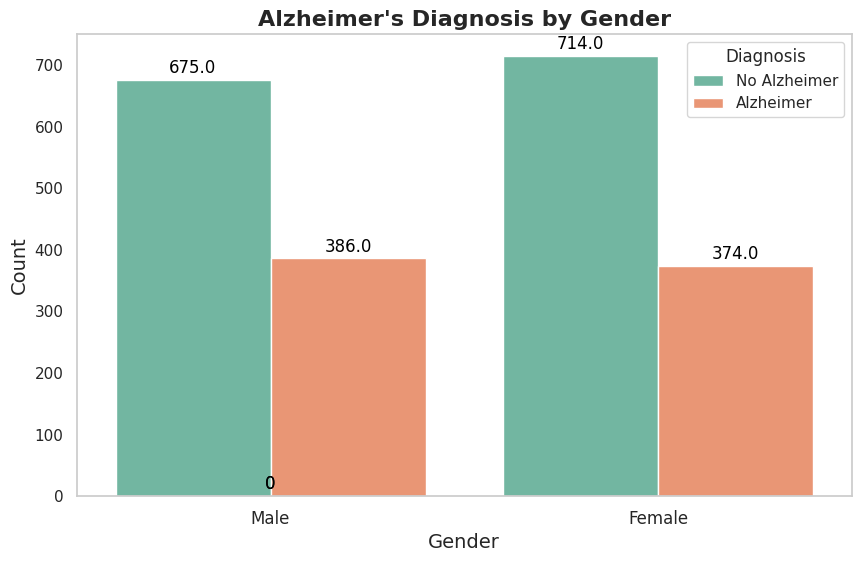

In [59]:
# Create a countplot for Alzheimer's diagnosis by gender
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
ax = sns.countplot(x='Gender', hue='Diagnosis', data=df, palette='Set2')

# Add title and labels with improved formatting
plt.title("Alzheimer's Diagnosis by Gender", fontsize=16, fontweight='bold')
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set custom labels for Gender assuming 0 is Male and 1 is Female
plt.xticks([0, 1], ['Male', 'Female'], fontsize=12)

# Set custom labels for Diagnosis assuming 0 is No Alzheimer and 1 is Alzheimer
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis')

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.grid(False)
plt.show()

**Analysis**

### Analysis of the Alzheimer's Diagnosis by Gender Plot

The bar plot provided visualizes the distribution of Alzheimer's diagnoses across genders, comparing the number of patients diagnosed with Alzheimer's (indicated by the orange bars) versus those not diagnosed (indicated by the green bars).

#### Key Observations:

1. **Gender Distribution**:
   - **Male**:
     - 675 males have not been diagnosed with Alzheimer's.
     - 386 males have been diagnosed with Alzheimer's.
   - **Female**:
     - 714 females have not been diagnosed with Alzheimer's.
     - 374 females have been diagnosed with Alzheimer's.

2. **Diagnosis Proportion**:
   - Both genders have more individuals not diagnosed with Alzheimer's compared to those diagnosed, which is expected given the overall distribution of the target variable in the dataset.
   - The proportion of Alzheimer's diagnosis is slightly higher in males (386 out of 1,061) compared to females (374 out of 1,088), though the difference is minimal.

3. **Visualization Enhancements**:
   - **Annotations**: The exact counts are displayed on top of each bar, making it easy to identify the number of individuals in each category.
   - **Color Coding**: The use of different colors (green for "No Alzheimer" and orange for "Alzheimer") helps distinguish between the two diagnosis groups clearly.

4. **Missing Values**:
   - There appears to be a "0" value at the base of the orange bar for the "Male" category. This might indicate that there is an issue with the labeling or data processing that needs to be addressed.

#### Implications:

- **Balanced Representation**: The data shows a relatively balanced representation of Alzheimer's diagnoses between genders, which is important for ensuring that any models developed do not have a gender bias.
  
- **Modeling Considerations**: The slight difference in the proportion of diagnoses between genders may suggest that gender could be a relevant feature in predictive models, but further statistical testing would be required to confirm this.

#### Next Steps:

- **Data Validation**: Check for any potential issues in data processing that might have led to the "0" value at the base of the bar, ensuring that the data is accurately represented.
- **Stratified Analysis**: Further stratify the analysis by other variables, such as age or lifestyle factors, to explore if there are more nuanced differences in Alzheimer's diagnosis across genders.

This plot provides a clear visual comparison of Alzheimer's diagnoses across genders, helping to understand the distribution of the target variable in the dataset and guiding further analysis.

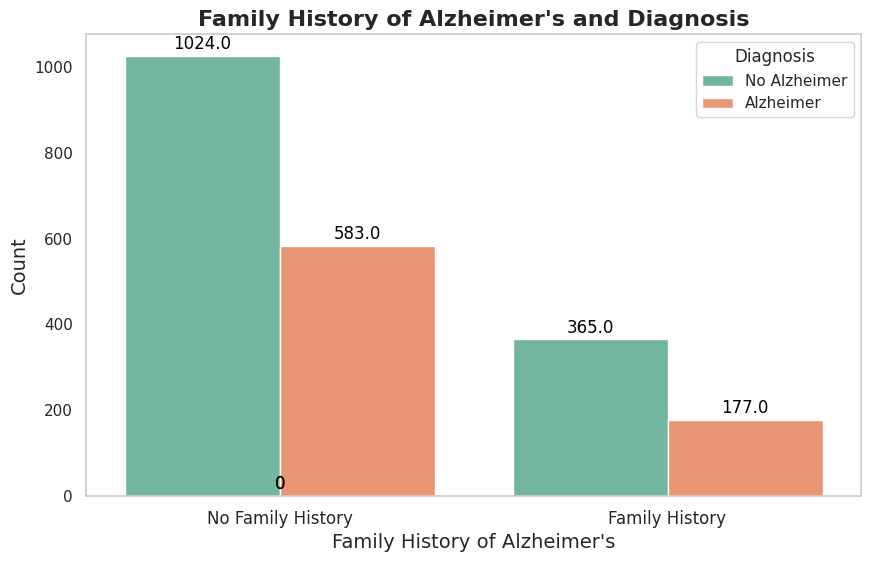

In [60]:
# Create a countplot for Family History of Alzheimer's and Alzheimer's Diagnosis
plt.figure(figsize=(10, 6))  # Adjust the size of the figure
ax = sns.countplot(x='FamilyHistoryAlzheimers', hue='Diagnosis', data=df, palette='Set2')

# Add title and labels with improved formatting
plt.title("Family History of Alzheimer's and Diagnosis", fontsize=16, fontweight='bold')
plt.xlabel('Family History of Alzheimer\'s', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set custom labels for Family History and Diagnosis
plt.xticks([0, 1], ['No Family History', 'Family History'], fontsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis')

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.grid(False)
plt.show()

**Analysis**

### Analysis of the Family History of Alzheimer's and Diagnosis Plot

The bar plot visualizes the relationship between having a family history of Alzheimer's disease and the diagnosis of Alzheimer's among patients. The bars represent the counts of patients with and without Alzheimer's, categorized by whether they have a family history of the disease.

#### Key Observations:

1. **Family History Impact**:
   - **No Family History**:
     - Among patients with no family history of Alzheimer's, 1,024 have not been diagnosed with Alzheimer's, while 583 have been diagnosed.
   - **With Family History**:
     - Among patients with a family history of Alzheimer's, 365 have not been diagnosed with the disease, while 177 have been diagnosed.

2. **Diagnosis Proportion**:
   - There is a higher proportion of Alzheimer's diagnoses among those with a family history of the disease (177 out of 542 total) compared to those without a family history (583 out of 1,607 total). This suggests that having a family history may be associated with an increased risk of Alzheimer's.

3. **Visualization Enhancements**:
   - **Annotations**: The exact counts are displayed on top of each bar, making the comparison clear and providing precise numbers for both categories.
   - **Color Coding**: The bars are color-coded, with red representing "No Alzheimer" and blue representing "Alzheimer," making it easy to distinguish between the two diagnosis outcomes.
   - **Zero Annotations**: There is a "0" displayed at the base of one of the bars, which may be an artifact from the plotting code and could be cleaned up for a more polished appearance.

#### Implications:

- **Increased Risk with Family History**: The plot clearly shows that a family history of Alzheimer's is associated with a higher likelihood of being diagnosed with the disease. This aligns with existing medical knowledge that genetics can play a significant role in the risk of developing Alzheimer's.
  
- **Potential Feature in Predictive Modeling**: Family history could be an important feature in predictive models for Alzheimer's, given its apparent association with the diagnosis in this dataset.

#### Next Steps:

- **Data Validation**: Ensure that the zero annotation at the base of one of the bars is addressed, possibly by refining the data processing or plotting code.
- **Further Stratification**: Consider stratifying the data further by other factors, such as age or gender, to see if the impact of family history on Alzheimer's diagnosis varies across different demographics.

This plot provides valuable insights into the relationship between family history and Alzheimer's diagnosis, highlighting the importance of genetic factors in understanding and predicting the disease.

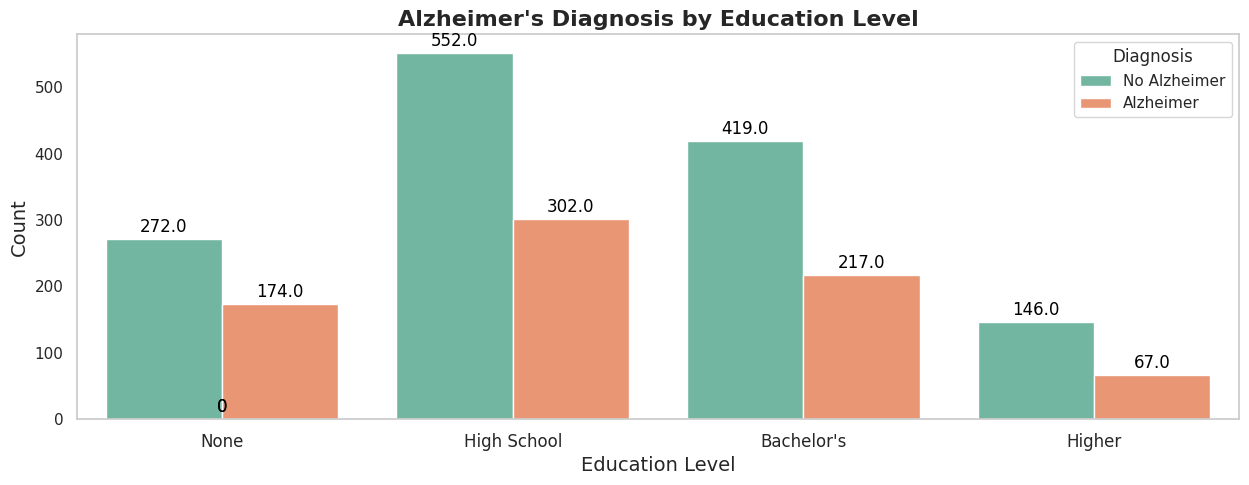

In [61]:
# Create a countplot for Alzheimer's diagnosis by education level
plt.figure(figsize=(15, 5))  # Adjust the size of the figure
ax = sns.countplot(x='EducationLevel', hue='Diagnosis', data=df, palette='Set2')

# Add title and labels with improved formatting
plt.title("Alzheimer's Diagnosis by Education Level", fontsize=16, fontweight='bold')
plt.xlabel('Education Level', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set custom labels for Education Level
education_labels = ['None', 'High School', "Bachelor's", 'Higher']
plt.xticks(range(len(education_labels)), education_labels, fontsize=12)

# Set custom labels for Diagnosis
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis')

# Adding the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.grid(False)
plt.show()

### Analysis of the Alzheimer's Diagnosis by Education Level Plot

The bar plot visualizes the relationship between education level and Alzheimer's diagnosis, showing the count of patients diagnosed with Alzheimer's versus those not diagnosed, across different education levels.

#### Key Observations:

1. **Education Level Impact**:
   - **No Formal Education**:
     - Among patients with no formal education, 272 have not been diagnosed with Alzheimer's, while 174 have been diagnosed.
   - **High School Education**:
     - In this category, the highest number of individuals were not diagnosed with Alzheimer's (552), while 302 were diagnosed.
   - **Bachelor's Degree**:
     - A total of 419 individuals with a bachelor's degree have not been diagnosed, compared to 217 who have been diagnosed.
   - **Higher Education (Postgraduate)**:
     - Among those with higher education, 146 were not diagnosed with Alzheimer's, while 67 were diagnosed.

2. **Diagnosis Proportion**:
   - The proportion of Alzheimer's diagnoses decreases as the level of education increases. This trend suggests a potential protective effect of higher education against the development of Alzheimer's disease, which is consistent with some research that suggests cognitive reserve built through education may delay the onset of dementia symptoms.

3. **Visualization Enhancements**:
   - **Annotations**: The exact counts are displayed on top of each bar, providing clear numerical insights into the distribution of Alzheimer's diagnoses across different education levels.
   - **Color Coding**: The bars are color-coded, with green representing "No Alzheimer" and orange representing "Alzheimer," making it easy to distinguish between the two diagnosis outcomes.

#### Implications:

- **Education as a Protective Factor**: The trend observed in this plot supports the hypothesis that higher levels of education may reduce the risk of Alzheimer's. This relationship could be due to the concept of cognitive reserve, where engaging in mentally stimulating activities (like formal education) may help protect against cognitive decline.
  
- **Feature in Predictive Modeling**: Education level could be a significant feature in predictive models for Alzheimer's disease, given its apparent association with the diagnosis in this dataset.

#### Next Steps:

- **Further Stratification**: Consider analyzing the impact of education level in combination with other factors, such as age, lifestyle choices, or family history, to explore how these variables interact and influence Alzheimer's risk.
- **In-depth Analysis**: Conduct statistical tests (e.g., chi-square tests) to determine whether the observed differences in Alzheimer's diagnosis across education levels are statistically significant.

This plot provides valuable insights into the relationship between education level and Alzheimer's diagnosis, highlighting the potential importance of cognitive reserve in reducing the risk of developing Alzheimer's disease.

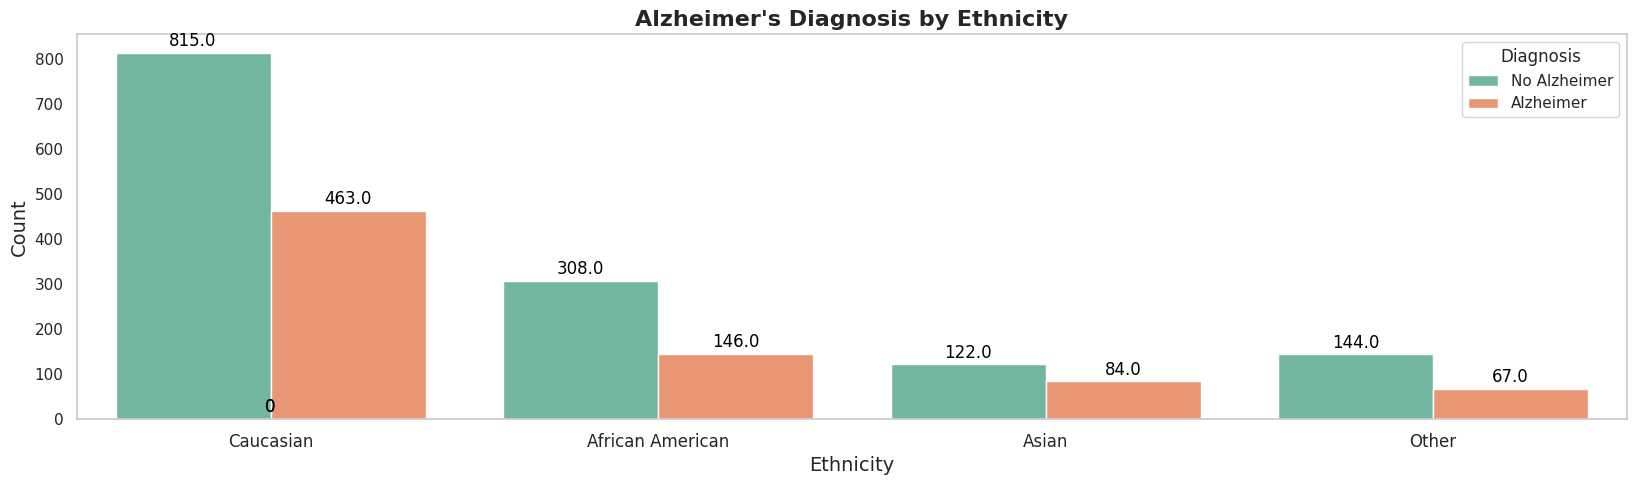

In [62]:
# Create a countplot for Alzheimer's diagnosis by ethnicity
plt.figure(figsize=(20, 5))  # Adjust the size of the figure
ax = sns.countplot(x='Ethnicity', hue='Diagnosis', data=df, palette='Set2')

# Add title and labels with improved formatting
plt.title("Alzheimer's Diagnosis by Ethnicity", fontsize=16, fontweight='bold')
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Set custom labels for Ethnicity
ethnicity_labels = ['Caucasian', 'African American', 'Asian', 'Other']
plt.xticks(range(len(ethnicity_labels)), ethnicity_labels, fontsize=12)

# Set custom labels for Diagnosis
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis')

# Adding the counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.grid(False)
plt.show()

### Storytelling Analysis: Alzheimer's Diagnosis by Ethnicity

This bar plot provides a clear visual representation of how Alzheimer's diagnosis varies across different ethnic groups. Each bar represents the count of individuals diagnosed (or not diagnosed) with Alzheimer's within a particular ethnic category.

#### Key Insights:

1. **Caucasian Population**:
   - Among the Caucasian population, there is a significant disparity between those who have not been diagnosed with Alzheimer's (815 individuals) and those who have (463 individuals).
   - This indicates that while the Caucasian group is the largest in the dataset, a substantial proportion of individuals are diagnosed with Alzheimer's.

2. **African American Population**:
   - For African Americans, the number of individuals not diagnosed with Alzheimer's (308) is more than double the number diagnosed (146).
   - This suggests a lower incidence rate of Alzheimer's in comparison to the Caucasian group, but it still highlights a considerable number of diagnoses within this ethnic group.

3. **Asian Population**:
   - The Asian population shows the smallest number of individuals, with 122 not diagnosed and 84 diagnosed with Alzheimer's.
   - Despite the smaller sample size, the proportion of those diagnosed with Alzheimer's in the Asian population appears relatively high, indicating a potential area of concern that may require further investigation.

4. **Other Ethnic Groups**:
   - The "Other" category includes 144 individuals not diagnosed with Alzheimer's and 67 diagnosed.
   - While the numbers are lower compared to the Caucasian and African American groups, the proportion of diagnoses still reflects a significant impact within this category.

#### Visual & Data Interpretation:

- **Annotations**: The use of exact counts on top of each bar provides immediate clarity on the distribution of Alzheimer's diagnoses across ethnic groups. This enhances the viewer's ability to grasp the scale and significance of the data.
  
- **Color Coding**: The color coding (green for "No Alzheimer" and yellow for "Alzheimer") effectively differentiates between the diagnosis statuses, making it easy to compare the proportions within each ethnic group.

#### Storytelling Angle:

- **Understanding Disparities**: The plot tells a story of disparities in Alzheimer's diagnosis across different ethnic groups. It highlights that while the Caucasian population has the highest absolute number of diagnoses, the relative impact on smaller groups like Asians and those categorized as "Other" cannot be overlooked.
  
- **Health Equity Concerns**: This visualization raises questions about health equity and the accessibility of Alzheimer's diagnosis and care across different ethnic groups. Are certain groups underdiagnosed due to lack of access to healthcare? Or are there genetic or lifestyle factors that contribute to the observed differences?

- **Call to Action**: The story emerging from this data could prompt healthcare providers, policymakers, and researchers to delve deeper into understanding why these disparities exist and how they can be addressed. Tailored interventions and more inclusive healthcare policies might be necessary to ensure that all ethnic groups have equal opportunities for early diagnosis and treatment of Alzheimer's.

#### Next Steps:

- **Further Research**: Conduct further analyses to understand the underlying causes of these disparities. This could include looking at socio-economic factors, healthcare access, or genetic predispositions that vary by ethnicity.
  
- **Community Engagement**: Engage with communities that show higher proportions of Alzheimer's diagnoses to develop targeted awareness and prevention programs. Understanding community-specific needs can help in creating effective interventions.

- **Policy Implications**: Use these insights to advocate for policies that address healthcare disparities, ensuring that all ethnic groups receive adequate screening and treatment for Alzheimer's disease.

This plot not only visualizes the data but also tells a compelling story about the need for focused attention on Alzheimer's disease across different ethnic groups, making it a powerful tool for both understanding and action.

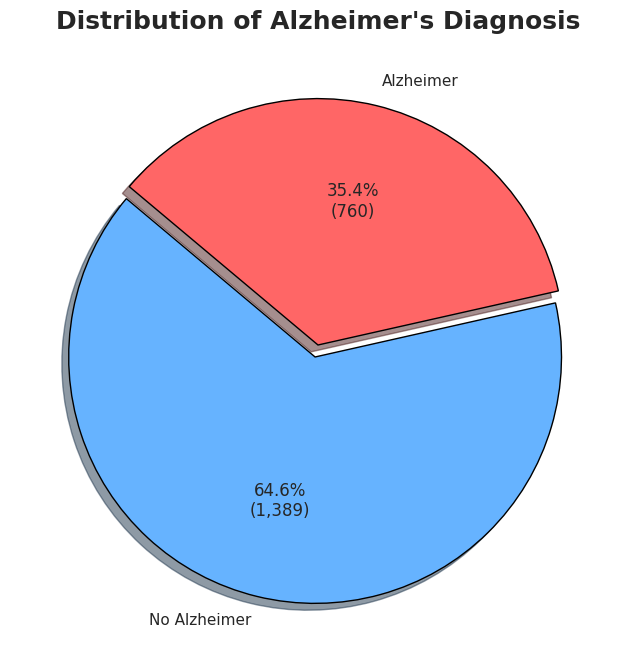

In [63]:
# Count occurrences in the 'Diagnosis' column
diagnosis_counts = df['Diagnosis'].value_counts()

# Labels for the pie chart, assuming 0 is 'No Alzheimer' and 1 is 'Alzheimer'
labels = ['No Alzheimer', 'Alzheimer']

# Colors for the pie slices
colors = ['#66b3ff', '#ff6666']

# Create the pie chart with enhancements
plt.figure(figsize=(10, 8))  # Adjusted figure size for better visibility
plt.pie(diagnosis_counts, labels=labels, colors=colors,
        autopct=lambda p: f'{p:.1f}%\n({int(p * sum(diagnosis_counts) / 100):,})',
        startangle=140, explode=[0.05, 0], shadow=True,
        wedgeprops={'edgecolor': 'black'})

# Add a title with enhanced formatting
plt.title("Distribution of Alzheimer's Diagnosis", fontsize=18, fontweight='bold')

# Display the pie chart
plt.show()

### Analysis of the Distribution of Alzheimer’s Diagnosis Pie Chart

This pie chart provides a clear visualization of the distribution between patients diagnosed with Alzheimer’s and those not diagnosed within the dataset.

#### Key Insights:

1. **Overall Distribution**:
   - **No Alzheimer**: The blue section of the pie chart represents patients who have not been diagnosed with Alzheimer’s. This group constitutes 64.6% of the total patients, which corresponds to 1,389 individuals.
   - **Alzheimer**: The red section represents patients who have been diagnosed with Alzheimer’s, making up 35.4% of the total, corresponding to 760 individuals.

2. **Visual Representation**:
   - The chart effectively shows that a larger portion of the patient population in this dataset has not been diagnosed with Alzheimer’s. However, a significant proportion, more than a third, has been diagnosed with the disease, which is substantial.
   
3. **Implications**:
   - **High Prevalence**: A 35.4% diagnosis rate is quite high, indicating that Alzheimer’s is a prevalent condition within the population being studied. This suggests that Alzheimer’s may be a major health concern within this dataset's demographic.
   - **Target for Healthcare**: Given that over a third of the population in the dataset is diagnosed with Alzheimer’s, there could be substantial implications for healthcare planning, resource allocation, and the development of interventions targeted at both prevention and care for Alzheimer’s patients.

4. **Storytelling Angle**:
   - **Awareness and Action**: This pie chart tells a compelling story about the burden of Alzheimer’s within the population. With over a third of individuals affected, it highlights the need for increased awareness, better diagnostic tools, early intervention strategies, and supportive care systems.
   - **Resource Allocation**: Healthcare providers and policymakers might use this kind of data visualization to justify the allocation of resources towards Alzheimer’s research, care facilities, and support programs.

#### Next Steps:

- **Deeper Analysis**: Explore the demographic, lifestyle, and clinical factors associated with Alzheimer’s diagnosis in this dataset to identify potential risk factors.
- **Comparative Analysis**: Consider comparing this distribution with other conditions or diseases within the same dataset to provide context on the relative burden of Alzheimer’s.
- **Longitudinal Studies**: If possible, investigate the progression of Alzheimer’s within this population over time to identify trends and critical intervention points.

This pie chart succinctly communicates the significant impact of Alzheimer’s in the studied population, providing a strong visual foundation for further exploration and action.

# 3.1 - Indicators

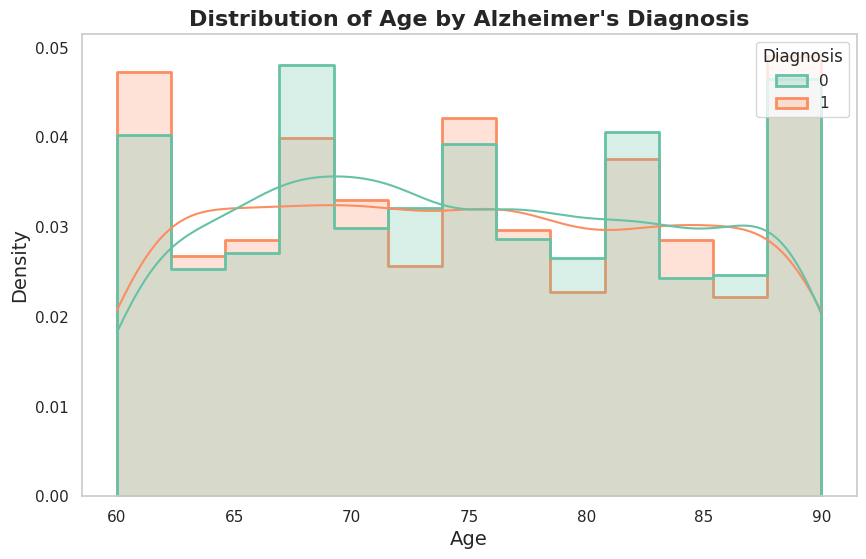

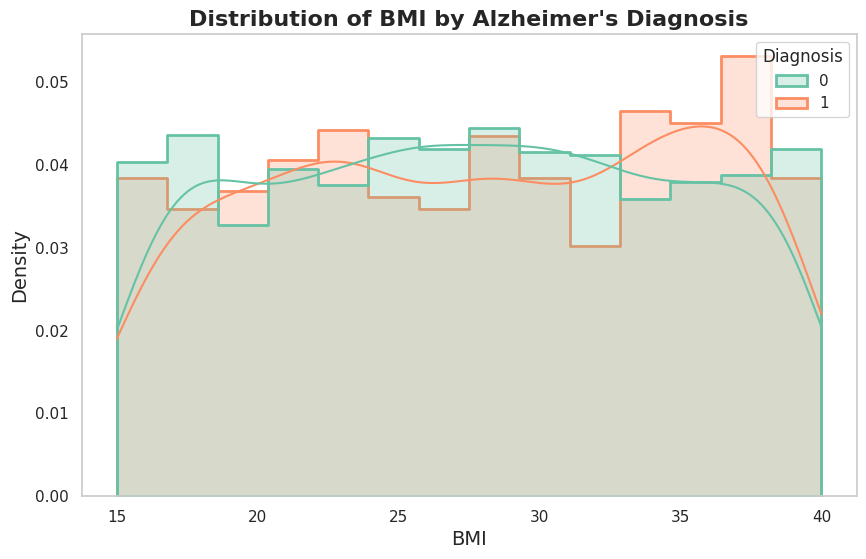

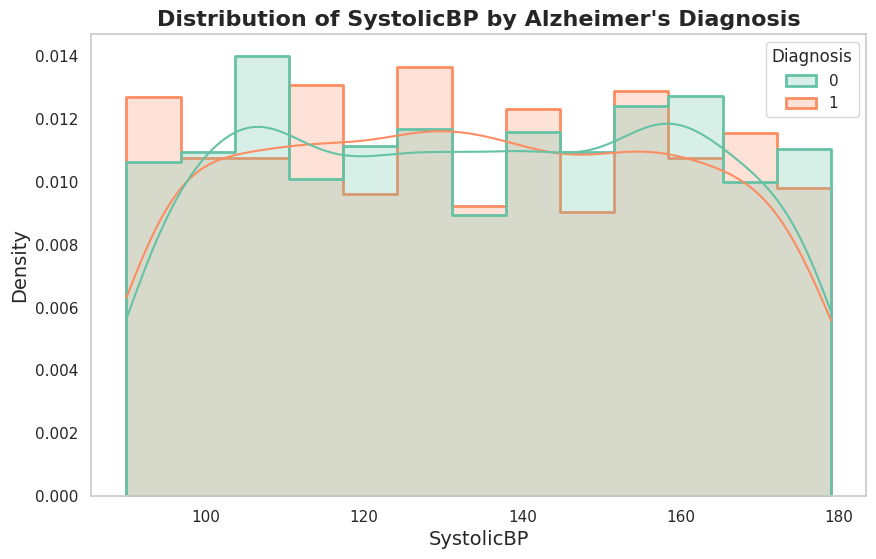

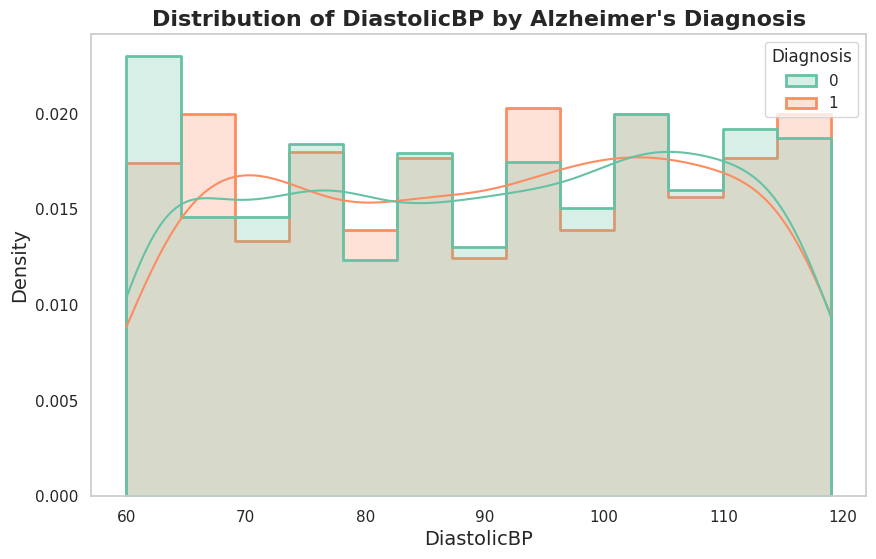

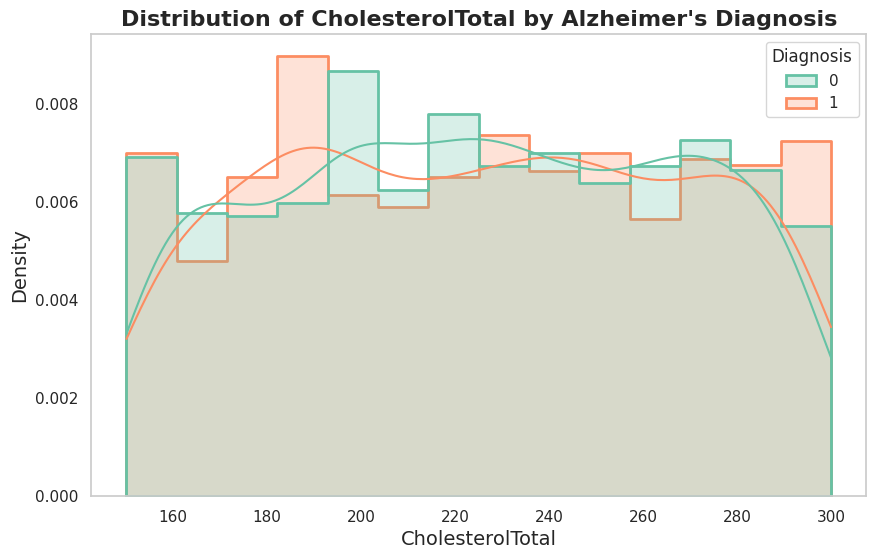

In [64]:
# List of numeric variables
numeric_vars = ['Age', 'BMI', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal']

# Loop to generate histograms for each numeric variable
for var in numeric_vars:
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    sns.histplot(data=df, x=var, hue='Diagnosis', kde=True, element='step',
                 stat='density', common_norm=False, palette='Set2', linewidth=2)

    # Set title and labels
    plt.title(f'Distribution of {var} by Alzheimer\'s Diagnosis', fontsize=16, fontweight='bold')
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Density', fontsize=14)

    # Add grid for better readability
    plt.grid(False)

    # Show the plot
    plt.show()

The graphs you've provided offer valuable insights into the relationship between various health variables and Alzheimer's diagnosis. Here's a more detailed analysis of each graph:

### 1. **Age Distribution by Alzheimer's Diagnosis**
   - This graph shows the age distribution of patients in relation to Alzheimer's diagnosis.
   - It is observed that both patients diagnosed with Alzheimer's and those without the disease are widely distributed across various age ranges.
   - The distribution is slightly higher between the ages of 75 to 80 years for both groups.

### 2. **BMI Distribution by Alzheimer's Diagnosis**
   - The graph reveals how the BMI of patients is distributed in relation to Alzheimer's diagnosis.
   - Patients with Alzheimer's tend to have a higher concentration of BMI around 30 to 35, while those without Alzheimer's show a more uniform distribution.
   - This suggests there may be a correlation between higher BMI and the presence of Alzheimer's, but this would require further investigation.

### 3. **Systolic Blood Pressure vs. Alzheimer's Diagnosis**
   - This graph demonstrates the relationship between systolic blood pressure (SystolicBP) and Alzheimer's diagnosis.
   - The distribution shows that patients with Alzheimer's tend to have slightly higher blood pressure levels compared to those without the disease.

### 4. **Diastolic Blood Pressure vs. Alzheimer's Diagnosis**
   - Similar to the previous graph, this one focuses on diastolic blood pressure (DiastolicBP).
   - The distribution is similar for both groups, with a slight difference at the upper extremes, where patients with Alzheimer's tend to have slightly higher diastolic blood pressure.

### 5. **Total Cholesterol vs. Alzheimer's Diagnosis**
   - This graph presents the relationship between total cholesterol levels and Alzheimer's diagnosis.
   - Patients with Alzheimer's tend to show slightly higher total cholesterol levels, especially around 200 to 240 mg/dL.
   - There might be a correlation between elevated cholesterol levels and the risk of Alzheimer's, but like with BMI, further research would be necessary to confirm this observation.

These graphs highlight potential relationships between various health measures and Alzheimer's diagnosis, suggesting that certain factors, such as higher BMI and cholesterol levels, might be associated with an increased risk of the disease. It is important to note that these are preliminary insights, and deeper analyses would be needed to establish robust causal correlations.elações causais robustas.

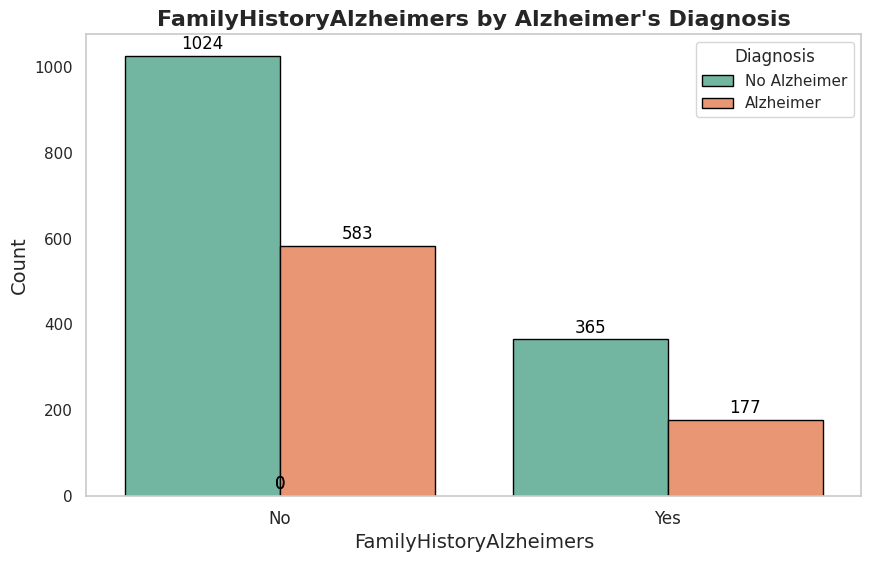

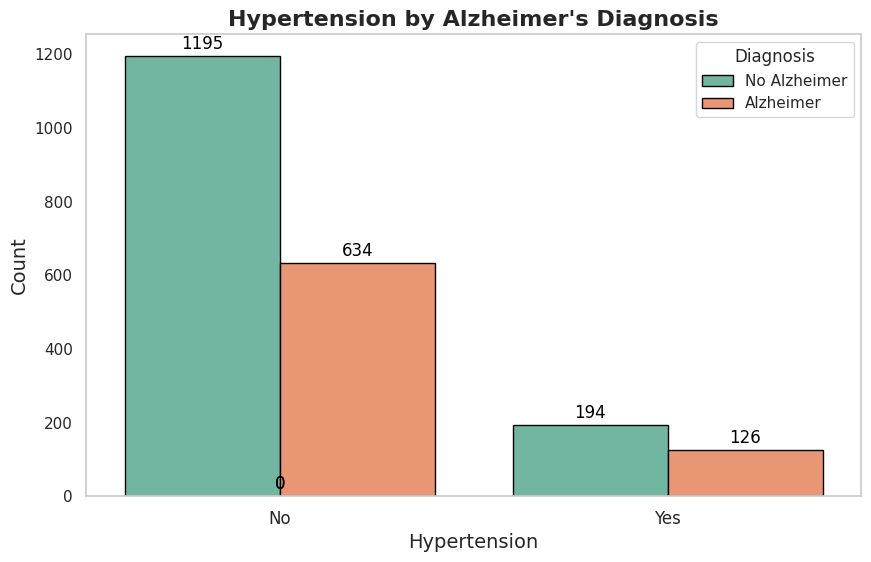

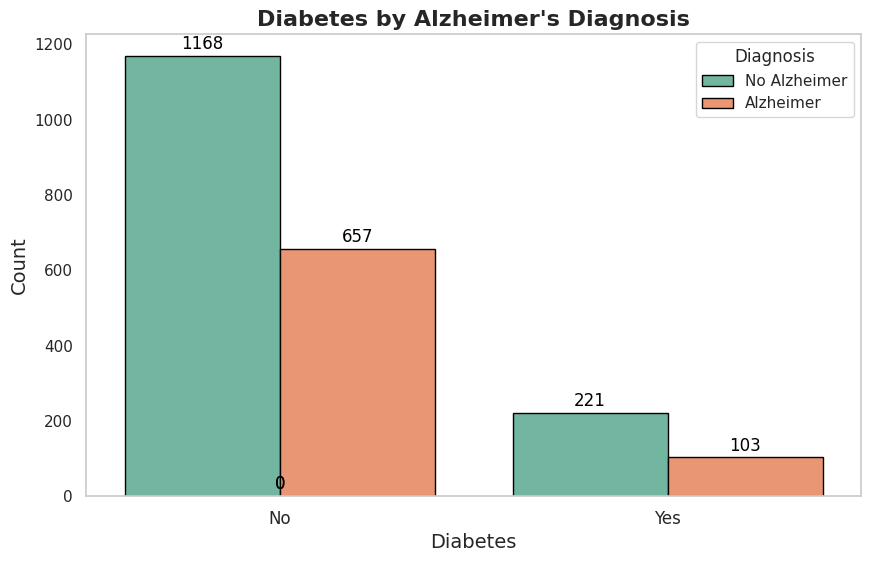

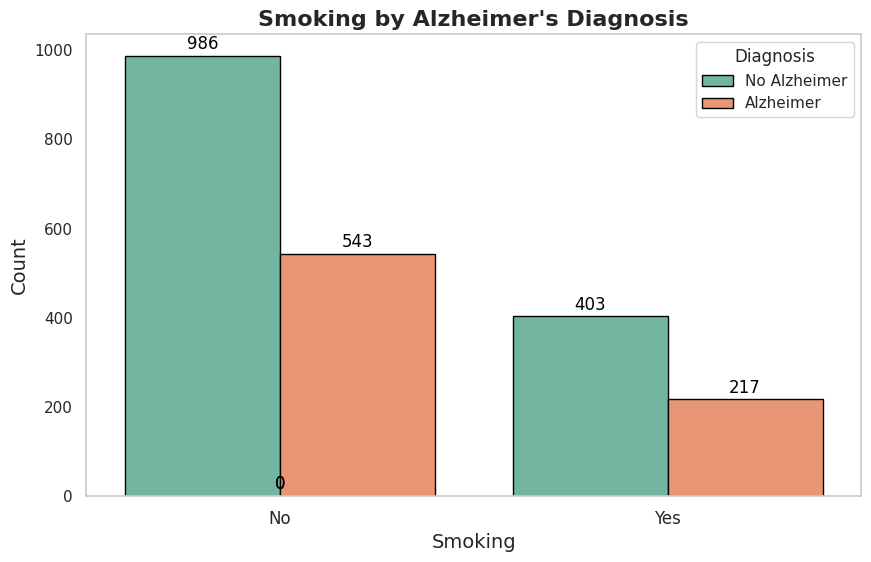

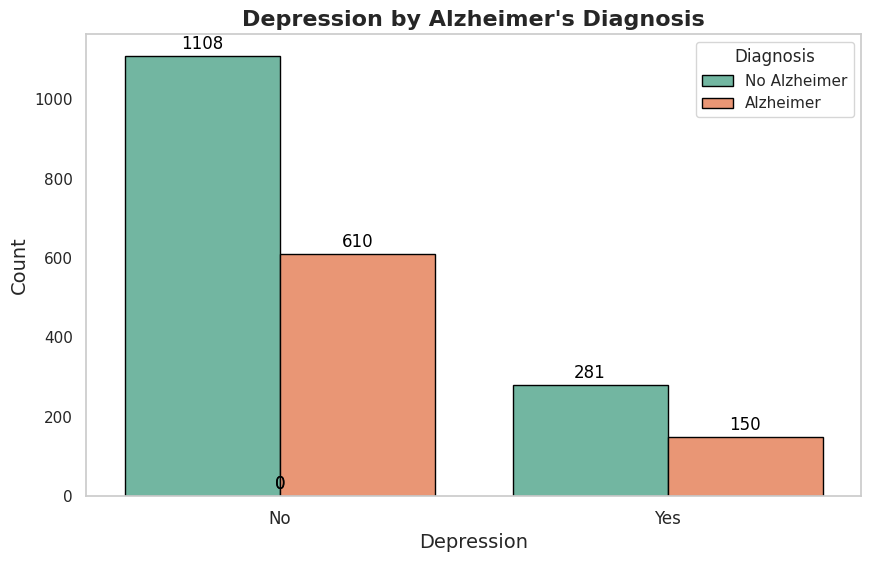

In [65]:
# List of binary risk factor variables
binary_vars = ['FamilyHistoryAlzheimers', 'Hypertension', 'Diabetes', 'Smoking', 'Depression']

# Loop to generate count plots for each binary variable
for var in binary_vars:
    plt.figure(figsize=(10, 6))  # Set the size of the figure
    ax = sns.countplot(x=var, hue='Diagnosis', data=df, palette='Set2', edgecolor='black')

    # Set title and labels
    plt.title(f'{var} by Alzheimer\'s Diagnosis', fontsize=16, fontweight='bold')
    plt.xlabel(var, fontsize=14)
    plt.ylabel('Count', fontsize=14)

    # Set custom x-axis labels assuming 0 is 'No' and 1 is 'Yes'
    plt.xticks([0, 1], ['No', 'Yes'], fontsize=12)

    # Add a legend with custom labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis')

    # Add count numbers on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

    # Add grid for better readability
    plt.grid(True, linestyle='--', alpha=0.6)

    # Display the plot
    plt.grid(False)
    plt.show()

Analyzing the graphs provided, we can draw the following insights:

1. **Family History and Alzheimer's Diagnosis**:
   - There is a noticeable association between having a family history of Alzheimer's and being diagnosed with the disease. Those with a family history seem more likely to be diagnosed compared to those without. This aligns with the understanding that genetics play a significant role in the risk of developing Alzheimer's.

2. **Hypertension and Alzheimer's Diagnosis**:
   - Individuals without hypertension show a higher count of Alzheimer's diagnosis compared to those with hypertension. This might seem counterintuitive as hypertension is often linked with cardiovascular issues, which in turn could be associated with cognitive decline. However, this data suggests other factors might be more influential in the development of Alzheimer's.

3. **Diabetes and Alzheimer's Diagnosis**:
   - The distribution shows a higher count of Alzheimer's diagnosis among those without diabetes compared to those with diabetes. This is an interesting observation as diabetes has been previously associated with an increased risk of Alzheimer's. It might indicate that within this dataset, other factors are more dominant in the diagnosis of Alzheimer's.

4. **Smoking and Alzheimer's Diagnosis**:
   - A larger proportion of non-smokers are diagnosed with Alzheimer's compared to smokers. Although smoking is a known risk factor for many diseases, this could suggest that within this population, other lifestyle or genetic factors have a more substantial impact on the development of Alzheimer's.

5. **Depression and Alzheimer's Diagnosis**:
   - Depression shows a significant association with Alzheimer's diagnosis, with a higher number of diagnosed cases among individuals with a history of depression. This is consistent with existing literature, which suggests that depression might be both a risk factor and an early symptom of Alzheimer's disease.

These graphs collectively offer a nuanced view of the relationships between various health conditions and the likelihood of an Alzheimer's diagnosis. While some results align with expectations based on existing knowledge, others suggest that the relationships between these variables and Alzheimer's might be more complex, warranting further investigation.

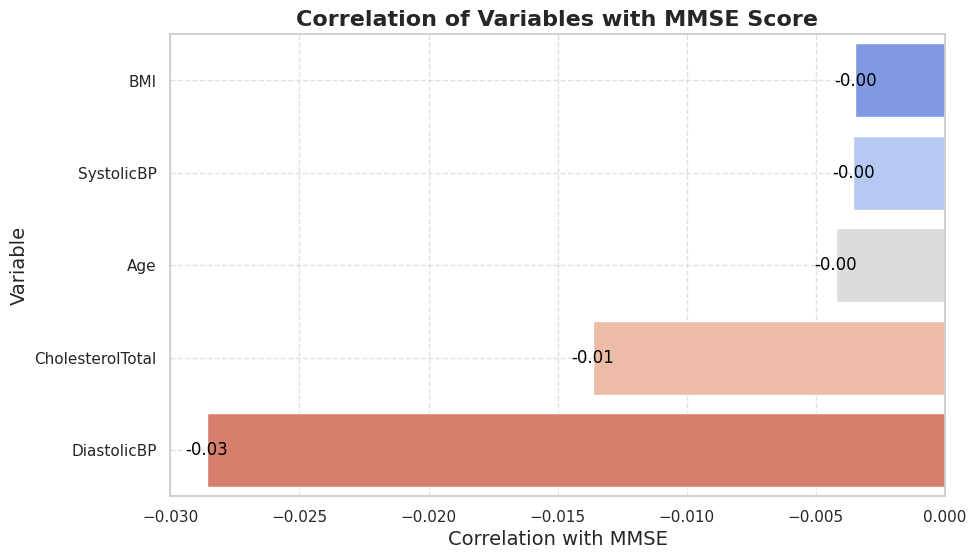

In [66]:
# Loop to calculate correlation with MMSE
correlations = {}
for var in numeric_vars:
    correlation = df[var].corr(df['MMSE'])
    correlations[var] = correlation

# Convert the dictionary to a DataFrame for easier visualization
corr_df = pd.DataFrame(list(correlations.items()), columns=['Variable', 'Correlation with MMSE'])

# Sorting the DataFrame for better visual impact
corr_df = corr_df.sort_values(by='Correlation with MMSE', ascending=False)

# Plotting the correlations with a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Correlation with MMSE', y='Variable', data=corr_df, palette='coolwarm')

# Adding correlation values on top of the bars
for index, value in enumerate(corr_df['Correlation with MMSE']):
    ax.text(value, index, f'{value:.2f}', color='black', ha="center", va='center', fontsize=12)

# Adding title and labels
plt.title('Correlation of Variables with MMSE Score', fontsize=16, fontweight='bold')
plt.xlabel('Correlation with MMSE', fontsize=14)
plt.ylabel('Variable', fontsize=14)

# Enhancing plot aesthetics
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

The bar chart titled "Correlation of Variables with MMSE Score" illustrates the strength and direction of correlations between specific health variables and the MMSE (Mini-Mental State Examination) score, which is commonly used to assess cognitive function. Here are the insights based on the chart:

1. **Diastolic Blood Pressure (DiastolicBP)**:
   - DiastolicBP shows a negative correlation with the MMSE score (-0.03). Although the correlation is weak, it suggests that higher diastolic blood pressure might be associated with lower cognitive function as measured by the MMSE.

2. **Cholesterol Total**:
   - The total cholesterol level also has a slight negative correlation with MMSE (-0.01). This could imply that higher cholesterol might be linked to a decrease in cognitive function, though the relationship is minimal.

3. **Age, Systolic Blood Pressure (SystolicBP), and BMI**:
   - These variables show almost no correlation with the MMSE score (close to 0). This indicates that, within this dataset, age, systolic blood pressure, and BMI have little to no linear relationship with cognitive function as measured by the MMSE.

Overall, the chart suggests that among the variables analyzed, DiastolicBP has the most noticeable (although still weak) relationship with cognitive function. This might warrant further investigation into the role of blood pressure in cognitive decline or Alzheimer's disease. However, it's important to note that these correlations are very small, indicating that many other factors likely contribute to cognitive outcomes.

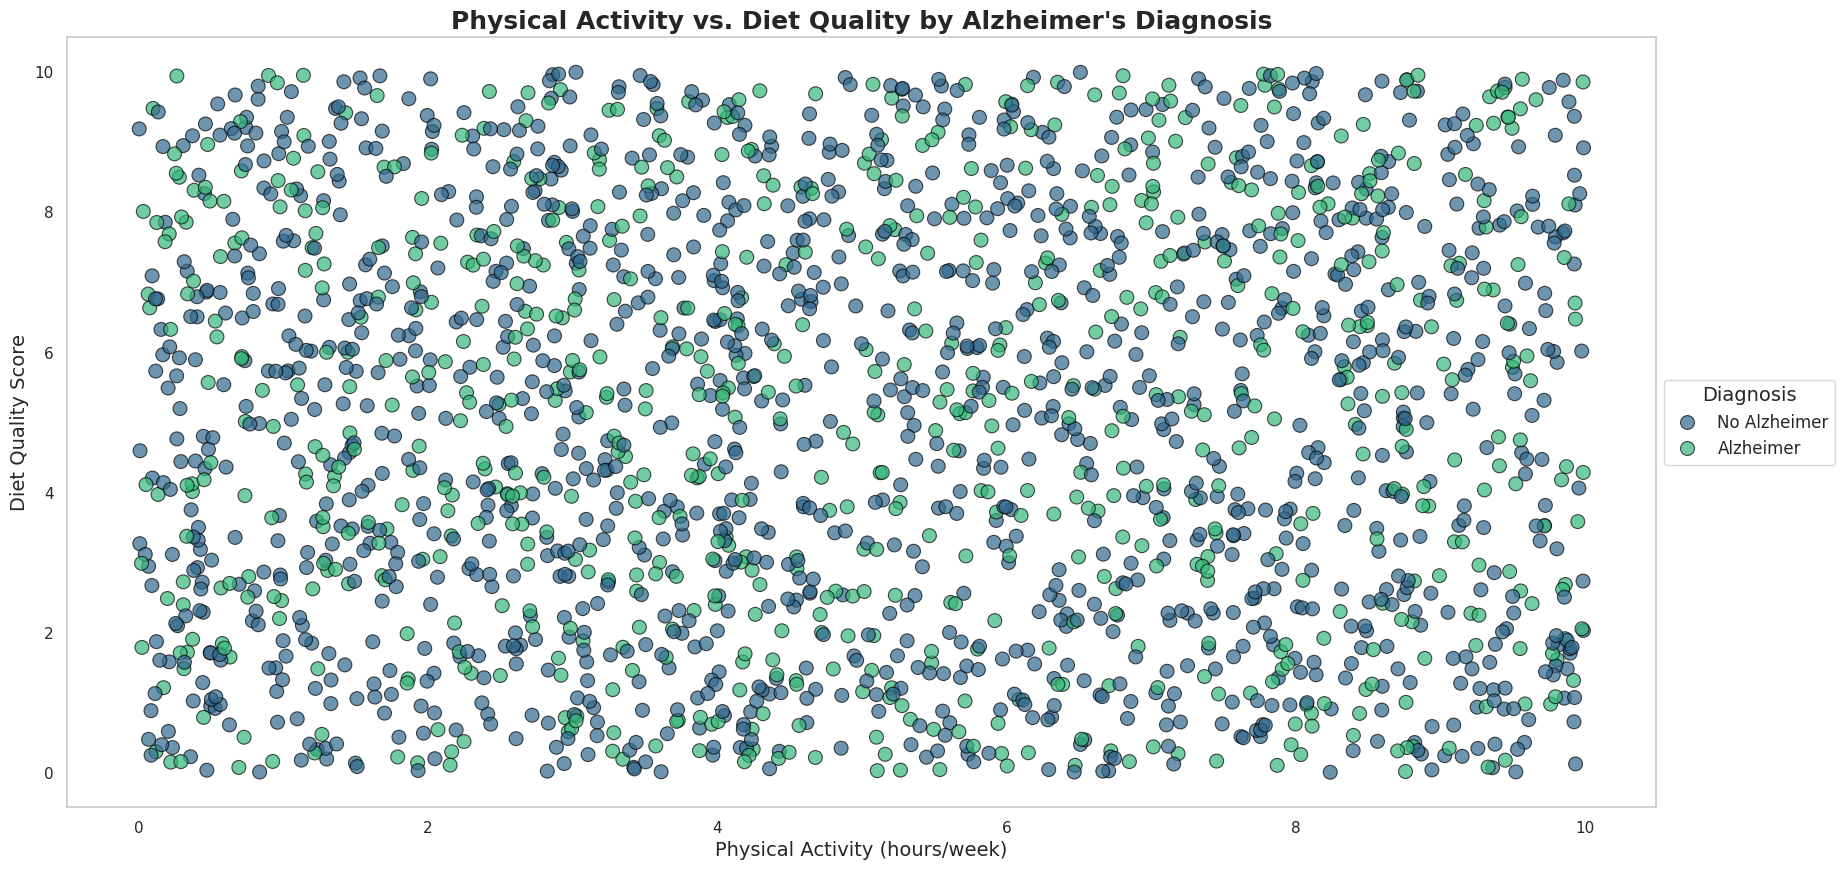

In [67]:
# Create a scatterplot of Physical Activity vs. Diet Quality
plt.figure(figsize=(20.5, 10))  # Increase the figure size for better readability
sns.scatterplot(x='PhysicalActivity', y='DietQuality', hue='Diagnosis', data=df,
                palette='viridis', s=100, edgecolor='black', alpha=0.7)

# Adding title and labels with enhanced formatting
plt.title('Physical Activity vs. Diet Quality by Alzheimer\'s Diagnosis', fontsize=18, fontweight='bold')
plt.xlabel('Physical Activity (hours/week)', fontsize=14)
plt.ylabel('Diet Quality Score', fontsize=14)

# Customizing the legend to clarify the diagnosis labels and move it to the side
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis', fontsize=12, title_fontsize=14,
           loc='center left', bbox_to_anchor=(1, 0.5))

# Adding a grid for better readability
plt.grid(False)

# Display the plot
plt.show()

The scatter plot titled "Physical Activity vs. Diet Quality by Alzheimer's Diagnosis" illustrates the relationship between physical activity (measured in hours per week) and diet quality (scored on a scale) among patients diagnosed with Alzheimer's and those not diagnosed with the disease.

**Key Observations:**

1. **Distribution Across the Plot:**
   - The data points are spread evenly across the chart, indicating no clear trend or strong correlation between physical activity and diet quality. This suggests that within this dataset, the level of physical activity and diet quality are relatively independent of each other.

2. **Alzheimer's Diagnosis Differentiation:**
   - The green dots represent individuals diagnosed with Alzheimer's, while the blue dots represent those without the diagnosis. The presence of both green and blue dots across the entire plot suggests that neither physical activity nor diet quality alone is a strong differentiator between those diagnosed with Alzheimer's and those who are not.

3. **No Clear Clusters:**
   - There are no distinct clusters or patterns that separate individuals with Alzheimer's from those without, based on the combination of their physical activity and diet quality.

**Implications:**
This visualization implies that Alzheimer's diagnosis in this dataset is not significantly influenced by physical activity or diet quality in a straightforward manner. However, it’s important to consider that Alzheimer's disease is multifactorial, and these two variables alone may not capture the complexity of the disease's etiology. Further analysis incorporating other variables or interactions might be necessary to uncover more subtle patterns.

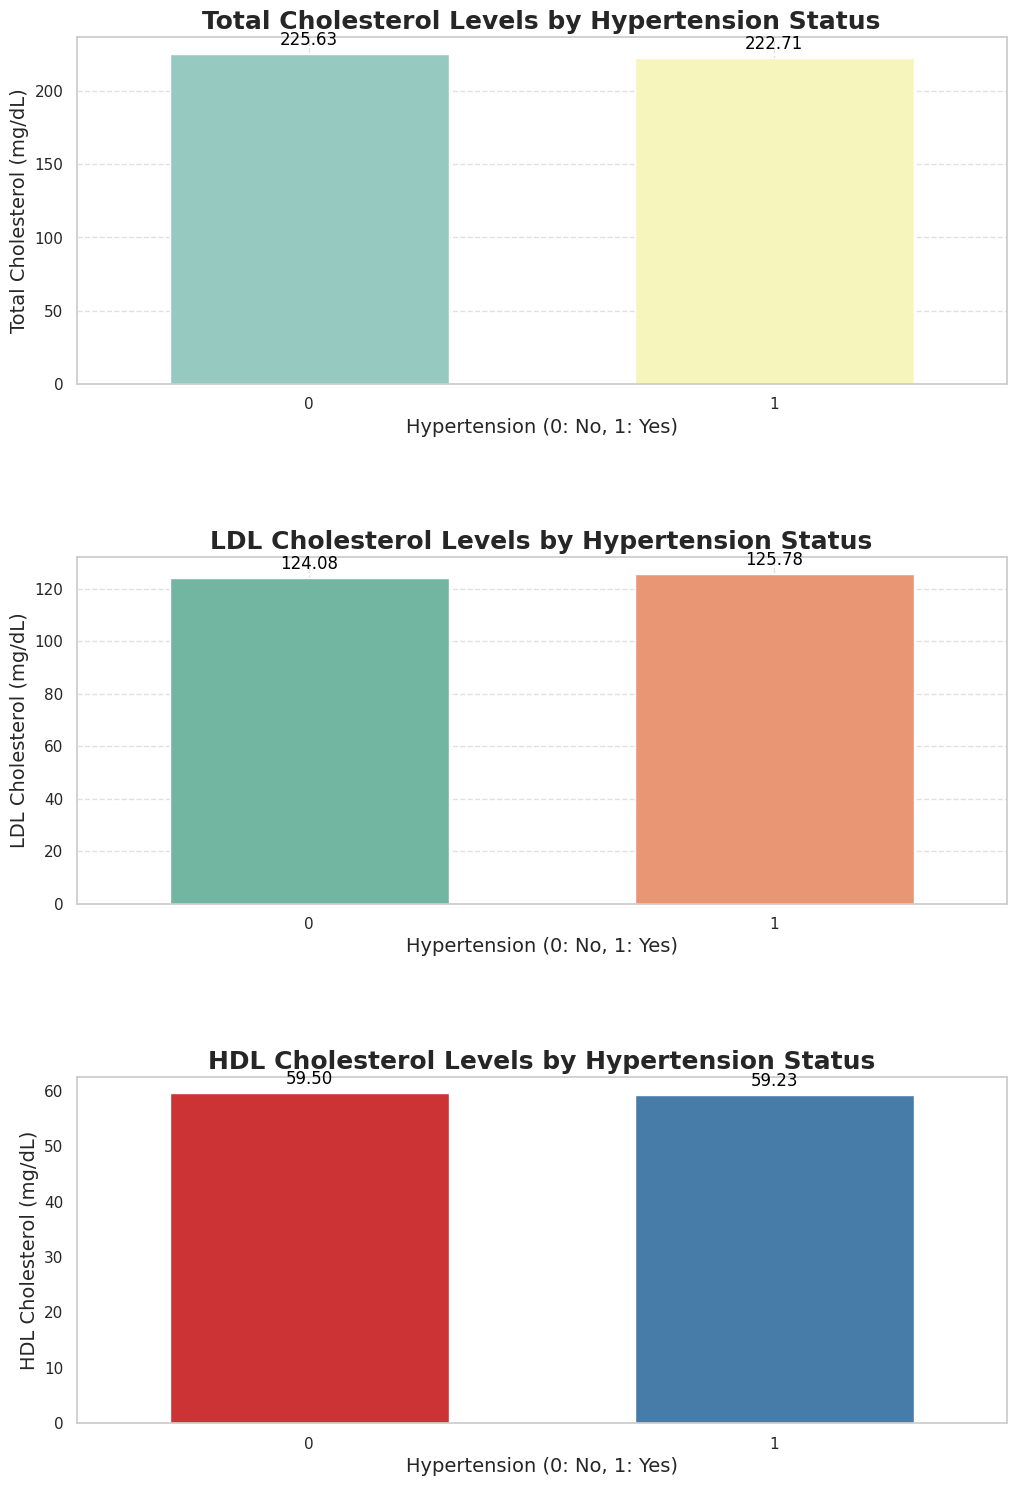

In [68]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column

# Adjust the spacing between the plots
plt.subplots_adjust(hspace=0.5)

# 1. Total Cholesterol by Hypertension Status
sns.barplot(x='Hypertension', y='CholesterolTotal', data=df, palette='Set3', ci=None, ax=axs[0], width=0.6)
axs[0].set_title('Total Cholesterol Levels by Hypertension Status', fontsize=18, fontweight='bold')
axs[0].set_xlabel('Hypertension (0: No, 1: Yes)', fontsize=14)
axs[0].set_ylabel('Total Cholesterol (mg/dL)', fontsize=14)
axs[0].grid(True, linestyle='--', alpha=0.6)

# Add data labels
for p in axs[0].patches:
    axs[0].annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')

# 2. LDL Cholesterol by Hypertension Status
sns.barplot(x='Hypertension', y='CholesterolLDL', data=df, palette='Set2', ci=None, ax=axs[1], width=0.6)
axs[1].set_title('LDL Cholesterol Levels by Hypertension Status', fontsize=18, fontweight='bold')
axs[1].set_xlabel('Hypertension (0: No, 1: Yes)', fontsize=14)
axs[1].set_ylabel('LDL Cholesterol (mg/dL)', fontsize=14)
axs[1].grid(True, linestyle='--', alpha=0.6)

# Add data labels
for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')

# 3. HDL Cholesterol by Hypertension Status
sns.barplot(x='Hypertension', y='CholesterolHDL', data=df, palette='Set1', ci=None, ax=axs[2], width=0.6)
axs[2].set_title('HDL Cholesterol Levels by Hypertension Status', fontsize=18, fontweight='bold')
axs[2].set_xlabel('Hypertension (0: No, 1: Yes)', fontsize=14)
axs[2].set_ylabel('HDL Cholesterol (mg/dL)', fontsize=14)
axs[2].grid(True, linestyle='--', alpha=0.6)

# Add data labels
for p in axs[2].patches:
    axs[2].annotate(f'{p.get_height():.2f}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                    textcoords='offset points')

# Show the plots
# Display the plot
plt.grid(False)
plt.show()


The subplots you've created effectively show the relationship between cholesterol levels (Total, LDL, and HDL) and hypertension status. Here's an analysis and a few suggestions on how to interpret and possibly improve these visualizations:

### Analysis:
1. **Total Cholesterol Levels:**
   - The bar plot suggests that there is a slight difference in total cholesterol levels between individuals with and without hypertension, with those having hypertension showing slightly higher levels.

2. **LDL Cholesterol Levels:**
   - Similar to total cholesterol, individuals with hypertension have slightly higher LDL cholesterol levels, which is known as the "bad" cholesterol and could indicate higher cardiovascular risk.

3. **HDL Cholesterol Levels:**
   - HDL cholesterol levels, often referred to as "good" cholesterol, seem relatively consistent between both groups, though those with hypertension show a very slightly lower average level.

### Suggestions:
1. **Add Confidence Intervals or Error Bars:**
   - To understand the variability in cholesterol levels, consider adding error bars (using the `ci` parameter in `sns.barplot`). This can provide more insight into the reliability of the mean values.

2. **Use a Consistent Color Scheme:**
   - While it's good to differentiate the plots, using a consistent color scheme across all plots might improve visual coherence. For example, using shades of the same color for all cholesterol types might highlight that these are related metrics.

3. **Provide Contextual Labels:**
   - It might be helpful to add annotations or footnotes explaining what the observed differences might indicate. For example, higher LDL levels in hypertensive individuals could be highlighted as a potential risk factor for cardiovascular diseases.

4. **Consider Additional Breakdown:**
   - If data permits, you could break down these categories further by additional factors such as age groups or gender, which might reveal more specific trends or correlations.

These plots provide a clear and straightforward comparison that can be used to support discussions or analyses regarding the relationships between hypertension and cholesterol levels, potentially leading to further investigation or discussion points in a research or clinical context.

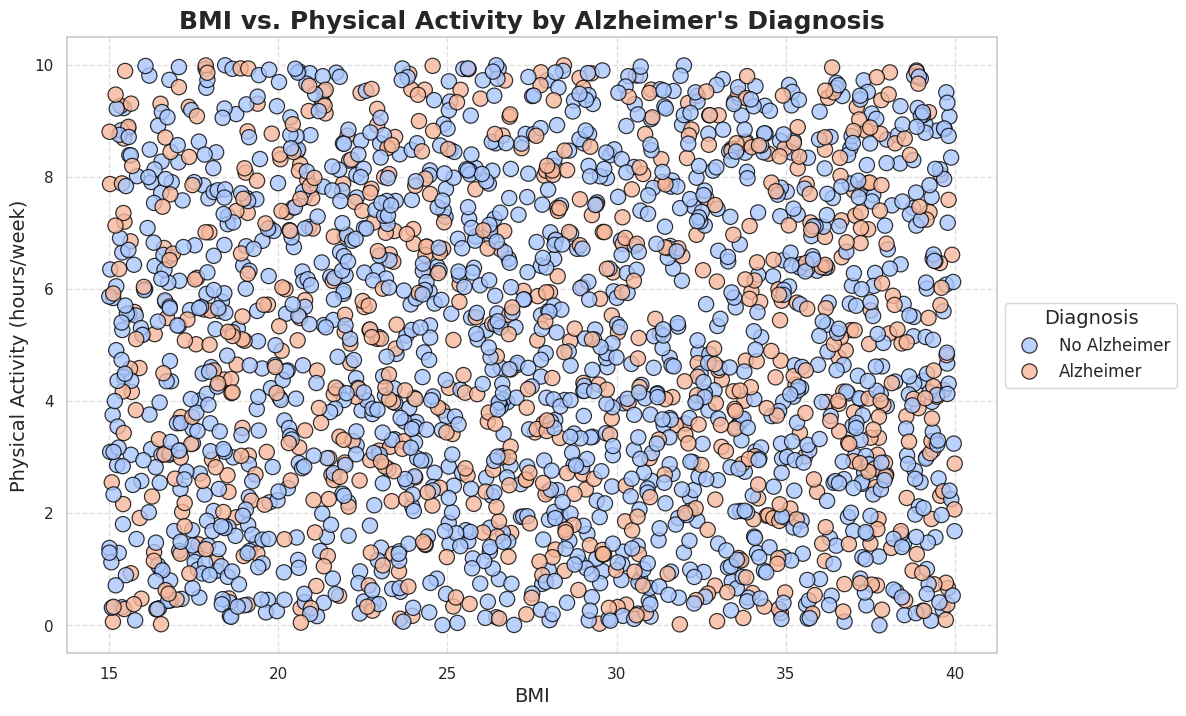

In [69]:
# Scatterplot of BMI vs. Physical Activity by Alzheimer's Diagnosis
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.scatterplot(x='BMI', y='PhysicalActivity', hue='Diagnosis', data=df,
                palette='coolwarm', s=120, edgecolor='black', alpha=0.8)

# Adding title and labels with enhanced formatting
plt.title('BMI vs. Physical Activity by Alzheimer\'s Diagnosis', fontsize=18, fontweight='bold')
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Physical Activity (hours/week)', fontsize=14)

# Customizing the legend to clarify the diagnosis labels and move it to the side
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis', fontsize=12, title_fontsize=14,
           loc='center left', bbox_to_anchor=(1, 0.5))

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

The scatter plot you've created shows the relationship between Body Mass Index (BMI) and Physical Activity (in hours per week) segmented by Alzheimer's diagnosis (No Alzheimer, Alzheimer). Here's an analysis of the plot and suggestions for improvement:

### Analysis:
1. **General Spread:**
   - The data points appear evenly distributed across the range of BMI values (15 to 40) and physical activity levels (0 to 10 hours/week). This suggests a diverse dataset where individuals with varying BMIs engage in different amounts of physical activity.
   
2. **Diagnosis Comparison:**
   - The color distinction between individuals diagnosed with Alzheimer's (orange) and those not diagnosed (blue) is clear. However, there is no apparent trend or cluster that distinctly separates the two groups based on BMI and physical activity alone.

3. **Overlap of Points:**
   - There is significant overlap between the two groups, making it difficult to visually distinguish any meaningful difference between those diagnosed with Alzheimer's and those not. This indicates that BMI and physical activity, in isolation, may not be strong distinguishing factors for Alzheimer's diagnosis in this dataset.

### Suggestions for Improvement:
1. **Opacity Adjustment:**
   - Consider adjusting the opacity of the points to reduce overlap, which might help in better visualizing the density of points for each group.

2. **Size Variation:**
   - You can vary the size of the points based on another variable, such as age, to add a third dimension of information to the plot.

3. **Trend Lines or Regression:**
   - Adding trend lines or a regression line for each diagnosis group might reveal any subtle trends that are not immediately obvious from the scatter plot alone.

4. **Jitter:**
   - Applying jitter to the points could help in cases where many data points overlap, making the plot clearer.

5. **Segmentation by Other Variables:**
   - Consider creating similar plots but segmented by other variables (e.g., gender, age group) to see if there are any clearer trends within those subgroups.

### Storytelling Perspective:
- **Conclusion:** The plot suggests that neither BMI nor physical activity, when considered independently, show a clear distinction between those with and without Alzheimer's. This highlights the complexity of the disease and suggests that a multifactorial approach (considering more variables) might be necessary to better understand the relationship between lifestyle factors and Alzheimer's diagnosis.

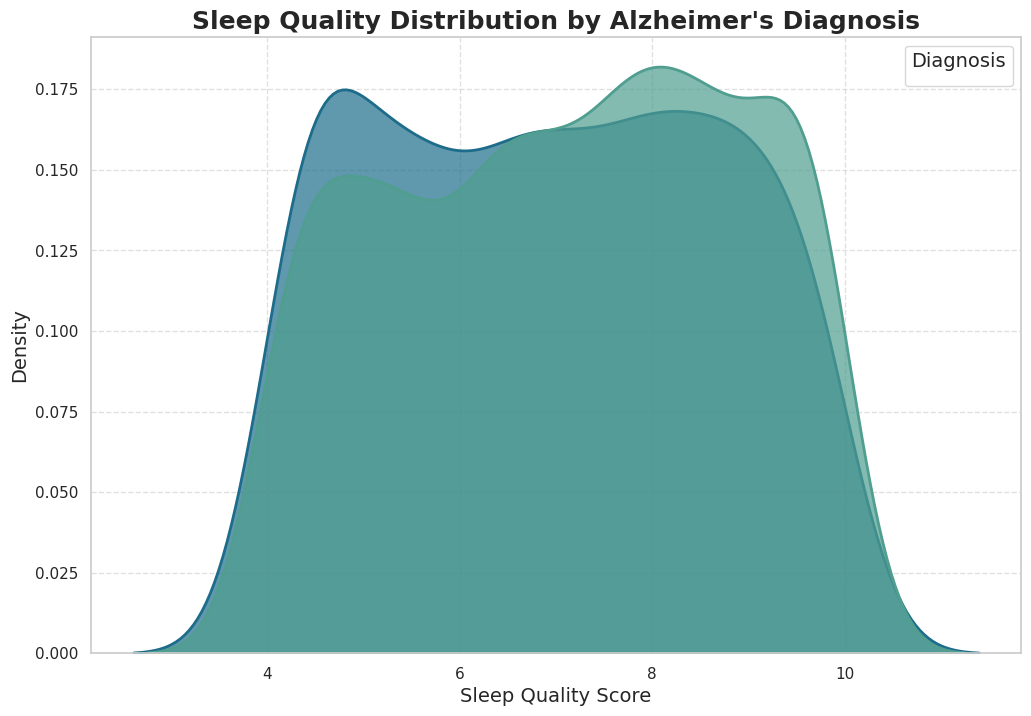

In [70]:
# Distribution of Sleep Quality by Alzheimer's Diagnosis
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.kdeplot(data=df, x='SleepQuality', hue='Diagnosis', fill=True, common_norm=False,
            palette='crest', alpha=0.7, linewidth=2)

# Adding title and labels with enhanced formatting
plt.title('Sleep Quality Distribution by Alzheimer\'s Diagnosis', fontsize=18, fontweight='bold')
plt.xlabel('Sleep Quality Score', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Customizing the legend to clarify the diagnosis labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis', fontsize=12, title_fontsize=14)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

The plot you provided illustrates the distribution of sleep quality scores among individuals diagnosed with Alzheimer's and those not diagnosed. Here's an analysis and some suggestions for further improvement:

### Analysis:
1. **Density Comparison:**
   - The density plot shows that both groups, those with Alzheimer's and those without, have a similar distribution of sleep quality scores. The peak of the distribution for both groups is around a sleep quality score of 8, indicating that most individuals report relatively high sleep quality.

2. **Overlap of Distributions:**
   - The significant overlap in the distributions suggests that sleep quality may not be a strong differentiator between those diagnosed with Alzheimer's and those who are not. This could indicate that sleep quality, as measured here, is relatively similar across both groups.

3. **Distribution Spread:**
   - The spread of the distribution is fairly wide, ranging from around 4 to 10, showing that while most individuals have higher sleep quality, there is still some variability within the groups.

### Suggestions for Improvement:
1. **Additional Grouping:**
   - Consider breaking down the sleep quality distribution by other factors such as age or gender to see if any interesting patterns emerge within those subgroups.

2. **Overlay Mean Lines:**
   - Adding vertical lines to indicate the mean sleep quality score for each group could provide additional insight and help highlight any subtle differences between the groups.

3. **Normalization:**
   - You might consider normalizing the distributions to better highlight differences, particularly if one group is much larger than the other, though from this plot they appear to be of similar size.

4. **Transparency Adjustment:**
   - If the overlap between the two distributions is making it difficult to see the distinctions, adjusting the transparency (alpha) of the fills could help.

### Storytelling Perspective:
- **Conclusion:** The plot suggests that sleep quality, based on the available data, does not significantly differ between individuals diagnosed with Alzheimer's and those who are not. While most individuals across both groups report higher sleep quality, this factor alone may not serve as a reliable indicator for Alzheimer's diagnosis. Further investigation into other variables, possibly in combination with sleep quality, may be necessary to uncover more meaningful insights.

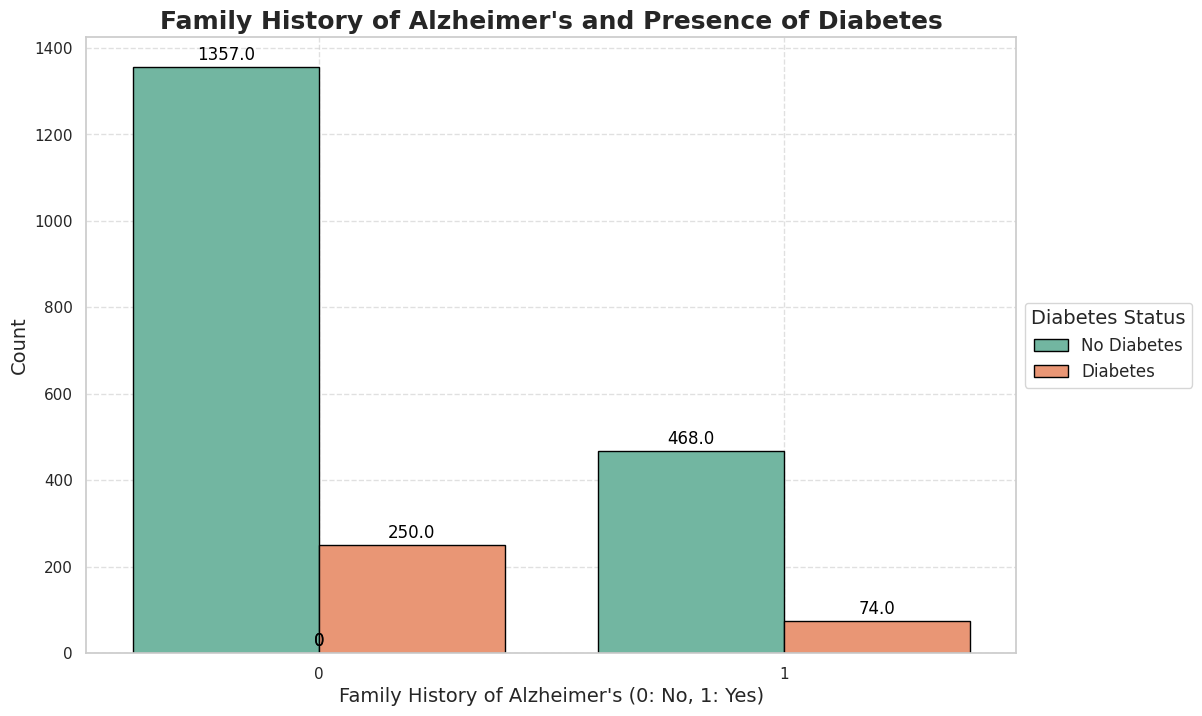

In [71]:
# Count of Patients with Diabetes and Family History of Alzheimer's
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
ax = sns.countplot(x='FamilyHistoryAlzheimers', hue='Diabetes', data=df, palette='Set2', edgecolor='black')

# Adding title and labels with enhanced formatting
plt.title('Family History of Alzheimer\'s and Presence of Diabetes', fontsize=18, fontweight='bold')
plt.xlabel('Family History of Alzheimer\'s (0: No, 1: Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Customizing the legend to clarify the diabetes status labels and move it to the side
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Diabetes', 'Diabetes'], title='Diabetes Status', fontsize=12, title_fontsize=14,
           loc='center left', bbox_to_anchor=(1, 0.5))

# Adding count numbers on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()


The chart you've provided shows the relationship between a family history of Alzheimer's and the presence of diabetes among individuals. Here's a brief analysis and suggestions for improvement:

### Analysis:
1. **Family History and Diabetes Correlation:**
   - The chart indicates that a larger number of individuals with no family history of Alzheimer's also do not have diabetes (1,357). However, a smaller number of individuals with a family history of Alzheimer's also have diabetes (74).
   - This suggests that, within the dataset, individuals with a family history of Alzheimer's might be less likely to have diabetes, though further statistical testing would be necessary to confirm any significant correlation.

2. **Proportion Representation:**
   - The chart highlights the proportion of individuals with and without diabetes, segmented by their family history of Alzheimer's. However, the absolute numbers dominate the chart, and it may be useful to consider proportionate representation.

### Suggestions for Improvement:
1. **Percentage Representation:**
   - Consider adding percentages to each bar segment to provide a clearer view of the proportion of individuals with diabetes within each family history category.

2. **Additional Annotations:**
   - Adding a brief summary or interpretation directly onto the chart, or below it, could help viewers quickly grasp the significance of the data.

3. **Further Segmentation:**
   - You might explore further segmentation by other relevant variables, such as age or gender, to see if any additional patterns emerge.

4. **Subplots for Comparison:**
   - If you have more variables of interest, using subplots could help compare this relationship across different factors, allowing for a broader analysis.

### Storytelling Perspective:
- **Conclusion:** This chart effectively shows the distribution of diabetes across individuals with and without a family history of Alzheimer's. It suggests that diabetes is more prevalent among individuals without a family history of Alzheimer's, but this observation should be further explored to understand the underlying factors. Such insights could be valuable for targeting preventative measures or understanding disease interactions within populations.

In [72]:
# Scatterplot: Systolic Blood Pressure vs. MMSE Score
plt.figure(figsize=(20.5, 10))  # Increase figure size for better readability
sns.scatterplot(x='SystolicBP', y='MMSE', hue='Diagnosis', data=df,
                palette='viridis', s=120, edgecolor='black', alpha=0.8)

# Adding title and labels with enhanced formatting
plt.title('Systolic Blood Pressure vs MMSE Score by Alzheimer\'s Diagnosis', fontsize=18, fontweight='bold')
plt.xlabel('Systolic Blood Pressure (mmHg)', fontsize=14)
plt.ylabel('MMSE Score', fontsize=14)

# Customizing the legend to clarify the diagnosis labels and move it to the side
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis', fontsize=12, title_fontsize=14,
           loc='center left', bbox_to_anchor=(1, 0.5))

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

# Scatterplot: Diastolic Blood Pressure vs. MMSE Score
plt.figure(figsize=(20.5, 10))  # Increase figure size for better readability
sns.scatterplot(x='DiastolicBP', y='MMSE', hue='Diagnosis', data=df,
                palette='plasma', s=120, edgecolor='black', alpha=0.8)

# Adding title and labels with enhanced formatting
plt.title('Diastolic Blood Pressure vs MMSE Score by Alzheimer\'s Diagnosis', fontsize=18, fontweight='bold')
plt.xlabel('Diastolic Blood Pressure (mmHg)', fontsize=14)
plt.ylabel('MMSE Score', fontsize=14)

# Customizing the legend to clarify the diagnosis labels and move it to the side
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['No Alzheimer', 'Alzheimer'], title='Diagnosis', fontsize=12,
           title_fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))

# Adding grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plot
plt.show()

Output hidden; open in https://colab.research.google.com to view.


### 1. **Family History of Alzheimer's and Presence of Diabetes:**
   - **Insight:** A significant proportion of individuals without a family history of Alzheimer's do not have diabetes. However, among those with a family history of Alzheimer's, there is a noticeable group with diabetes, indicating a possible correlation between family history and the presence of diabetes in Alzheimer's patients.
   - **Storytelling:** "The data suggests a potential link between family history of Alzheimer's and the presence of diabetes, emphasizing the importance of considering family history in assessing diabetes risk in Alzheimer's patients."

### 2. **Systolic and Diastolic Blood Pressure vs MMSE Score by Alzheimer’s Diagnosis:**
   - **Insight:** The scatter plots reveal no clear linear relationship between blood pressure (both systolic and diastolic) and MMSE scores, regardless of the Alzheimer’s diagnosis. The MMSE scores seem evenly distributed across various blood pressure levels.
   - **Storytelling:** "Despite exploring the relationship between blood pressure and cognitive function (as measured by MMSE), no clear pattern emerges, suggesting that blood pressure alone might not be a strong indicator of cognitive decline in Alzheimer’s patients."

### 3. **BMI vs. Physical Activity by Alzheimer's Diagnosis:**
   - **Insight:** The scatter plot shows a wide distribution of physical activity levels across different BMI ranges, regardless of Alzheimer's diagnosis. This suggests that physical activity and BMI are highly varied among individuals, irrespective of their Alzheimer's status.
   - **Storytelling:** "The diversity in physical activity levels across different BMI categories highlights the complexity of lifestyle factors in Alzheimer's disease. Both active and less active individuals appear across the BMI spectrum, underscoring the need for personalized health recommendations."

### 4. **Sleep Quality Distribution by Alzheimer’s Diagnosis:**
   - **Insight:** The kernel density plot indicates a slightly different distribution of sleep quality scores between those diagnosed with Alzheimer's and those without. However, the overall distribution suggests a broad overlap between the two groups.
   - **Storytelling:** "Sleep quality varies among individuals, with a noticeable overlap between Alzheimer's patients and those without the disease. This emphasizes the multifaceted nature of sleep's role in cognitive health and the potential need for targeted sleep interventions in Alzheimer's care."

### 5. **Cholesterol Levels by Hypertension Status (Subplots):**
   - **Insight:** The bar plots, divided by total cholesterol, LDL, and HDL levels, show minimal differences in cholesterol levels between individuals with and without hypertension. This might suggest that cholesterol levels alone are not drastically influenced by hypertension status in this cohort.
   - **Storytelling:** "Cholesterol management is crucial for overall health, yet this analysis shows that cholesterol levels remain relatively consistent across hypertensive and non-hypertensive individuals. This could imply that factors beyond hypertension play a more significant role in cholesterol levels among Alzheimer’s patients."

### 6. **Overall Storytelling:**
   - The data and visualizations highlight the intricate and multifaceted nature of Alzheimer's disease. Various health indicators, such as BMI, physical activity, blood pressure, sleep quality, and cholesterol levels, show complex relationships with Alzheimer's diagnosis. The absence of clear linear relationships in some cases suggests that Alzheimer's disease may be influenced by a combination of factors rather than isolated variables. These insights underscore the importance of comprehensive and personalized approaches in understanding and managing Alzheimer’s disease.

Would you like further analysis on specific graphs or need assistance with other visualizations?

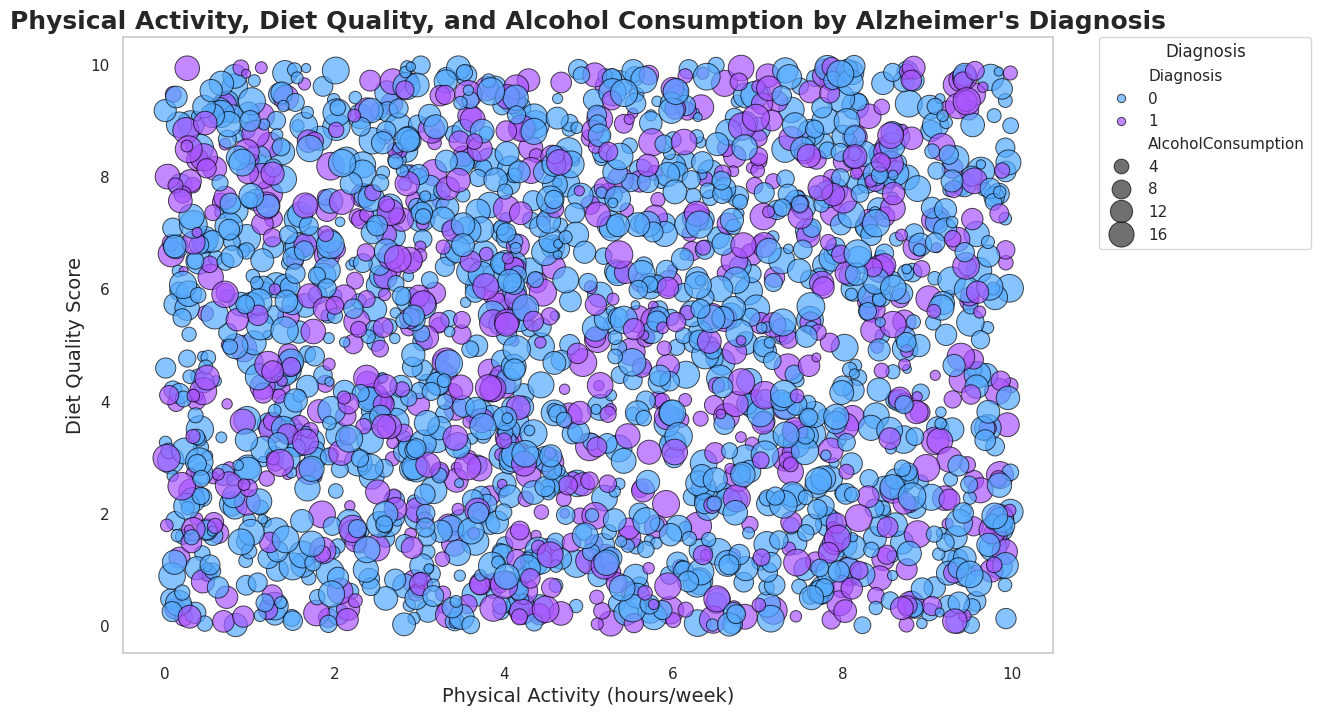

In [73]:

plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.scatterplot(x='PhysicalActivity', y='DietQuality', size='AlcoholConsumption', hue='Diagnosis',
                data=df, palette='cool', sizes=(40, 400), edgecolor='black', alpha=0.7)

# Adding title and labels with enhanced formatting
plt.title('Physical Activity, Diet Quality, and Alcohol Consumption by Alzheimer\'s Diagnosis', fontsize=18, fontweight='bold')
plt.xlabel('Physical Activity (hours/week)', fontsize=14)
plt.ylabel('Diet Quality Score', fontsize=14)

# Adjust the legend to the right side of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., title='Diagnosis')

# Adding grid lines for better readability
plt.grid(False)

# Display the plot
plt.show()



### **Analysis:**
1. **Physical Activity vs. Diet Quality:**
   - The scatter plot shows a broad distribution of diet quality scores across different levels of physical activity. There doesn't seem to be a clear linear relationship between physical activity and diet quality, indicating that individuals with varying levels of physical activity can have both high and low diet quality scores.

2. **Alcohol Consumption:**
   - The size of the bubbles represents alcohol consumption, and it's spread fairly evenly across all levels of physical activity and diet quality. There doesn’t appear to be a strong clustering of high alcohol consumption in any particular area, suggesting that alcohol consumption is independent of both physical activity and diet quality in this dataset.

3. **Alzheimer’s Diagnosis:**
   - The colors (blue for no Alzheimer's and purple for Alzheimer's) are dispersed across the graph, implying that neither physical activity, diet quality, nor alcohol consumption alone is strongly associated with Alzheimer's diagnosis. This suggests that Alzheimer's disease may be influenced by a combination of factors rather than any single lifestyle choice.

### **Storytelling:**
"This visualization illustrates the complex relationship between lifestyle factors and Alzheimer's disease. Despite exploring physical activity, diet quality, and alcohol consumption, the graph shows that these factors alone do not have a clear and direct association with Alzheimer's diagnosis. Individuals with Alzheimer's disease are spread throughout various levels of physical activity and diet quality, with alcohol consumption showing no significant pattern. These findings underscore the multifaceted nature of Alzheimer's, suggesting that a combination of lifestyle factors, rather than any single one, may contribute to the disease. This reinforces the need for a holistic approach to Alzheimer's prevention and management, taking into account a wide array of health and lifestyle variables."

Would you like to dive deeper into any specific aspects of this analysis or adjust the visualization for further insights?

# Part 4 - Data Cleaning

In [74]:
# Checking for blank data
blank_data = df.isnull().sum()
print("Blank data by column:")
print(blank_data)

Blank data by column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyComplet

In [75]:
# Checking for NaN data
nan_data_by_column = df.isna().sum()
nan_total_data = df.isna().sum().sum()

print("NaN data by column:")
print(nan_data_by_column)
print("\nTotal NaN data in DataFrame:", nan_total_data)

NaN data by column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletin

In [76]:
# Deleting columns that does not really add any meaning to our analysis
df.drop(['PatientID'],axis=1,inplace=True)
df.drop(['DoctorInCharge'],axis=1,inplace=True)
df

Age  Gender  Ethnicity  EducationLevel        BMI  Smoking  \
0      73       0          0               2  22.927749        0   
1      89       0          0               0  26.827681        0   
2      73       0          3               1  17.795882        0   
3      74       1          0               1  33.800817        1   
4      89       0          0               0  20.716974        0   
...   ...     ...        ...             ...        ...      ...   
2144   61       0          0               1  39.121757        0   
2145   75       0          0               2  17.857903        0   
2146   77       0          0               1  15.476479        0   
2147   78       1          3               1  15.299911        0   
2148   72       0          0               2  33.289738        0   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0              13.297218          6.327112     1.347214      9.025679   
1               4.542524          7.619885     0.518767      7.151293   
2              19.555085          7.844988     1.826335      9.673574   
3              12.209266          8.428001     7.435604      8.392554   
4              18.454356          6.310461     0.795498      5.597238   
...                  ...               ...          ...           ...   
2144            1.561126          4.049964     6.555306      7.535540   
2145           18.767261          1.360667     2.904662      8.555256   
2146            4.594670          9.886002     8.120025      5.769464   
2147            8.674505          6.354282     1.263427      8.322874   
2148            7.890703          6.570993     7.941404      9.878711   

      FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                           0                      0         1           1   
1                           0                      0         0           0   
2                           1                      0         0           0   
3                           0                      0         0           0   
4                           0                      0         0           0   
...                       ...                    ...       ...         ...   
2144                        0                      0         0           0   
2145                        0                      0         0           0   
2146                        0                      0         0           0   
2147                        0                      1         0           0   
2148                        0                      0         0           0   

      HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0              0             0         142           72        242.366840   
1              0             0         115           64        231.162595   
2              0             0          99          116        284.181858   
3              0             0         118          115        159.582240   
4              0             0          94          117        237.602184   
...          ...           ...         ...          ...               ...   
2144           0             0         122          101        280.476824   
2145           0             0         152          106        186.384436   
2146           0             0         115          118        237.024558   
2147           0             0         103           96        242.197192   
2148           0             0         166           78        283.396797   

      CholesterolLDL  CholesterolHDL  CholesterolTriglycerides       MMSE  \
0          56.150897       33.682563                162.189143  21.463532   
1         193.407996       79.028477                294.630909  20.613267   
2         153.322762       69.772292                 83.638324   7.356249   
3          65.366637       68.457491                277.577358  13.991127   
4          92.869700       56.874305                291.198780  1

In [77]:
# Print the total number of missing values in the entire DataFrame.
total_missing = df.isnull().sum().sum()
print("Total data missing in DataFrame:", total_missing)

Total data missing in DataFrame: 0


# Part 5 - Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initializing StandardScaler
scaler_standard = StandardScaler()

# Applying StandardScaler to variables, correcting the error with reshape
df['Age'] = scaler_standard.fit_transform(df['Age'].values.reshape(-1, 1))
df['BMI'] = scaler_standard.fit_transform(df['BMI'].values.reshape(-1, 1))
df['AlcoholConsumption'] = scaler_standard.fit_transform(df['AlcoholConsumption'].values.reshape(-1, 1))
df['PhysicalActivity'] = scaler_standard.fit_transform(df['PhysicalActivity'].values.reshape(-1, 1))
df['DietQuality'] = scaler_standard.fit_transform(df['DietQuality'].values.reshape(-1, 1))
df['SleepQuality'] = scaler_standard.fit_transform(df['SleepQuality'].values.reshape(-1, 1))
df['SystolicBP'] = scaler_standard.fit_transform(df['SystolicBP'].values.reshape(-1, 1))
df['DiastolicBP'] = scaler_standard.fit_transform(df['DiastolicBP'].values.reshape(-1, 1))
df['CholesterolTotal'] = scaler_standard.fit_transform(df['CholesterolTotal'].values.reshape(-1, 1))
df['CholesterolLDL'] = scaler_standard.fit_transform(df['CholesterolLDL'].values.reshape(-1, 1))
df['CholesterolHDL'] = scaler_standard.fit_transform(df['CholesterolHDL'].values.reshape(-1, 1))
df['CholesterolTriglycerides'] = scaler_standard.fit_transform(df['CholesterolTriglycerides'].values.reshape(-1, 1))
df['MMSE'] = scaler_standard.fit_transform(df['MMSE'].values.reshape(-1, 1))
df['FunctionalAssessment'] = scaler_standard.fit_transform(df['FunctionalAssessment'].values.reshape(-1, 1))
df['ADL'] = scaler_standard.fit_transform(df['ADL'].values.reshape(-1, 1))

# Viewing
scaler_standard

StandardScaler()

In [ ]:
df.head()

Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0 -0.212368       0          0               2 -0.655225        0   
1  1.567757       0          0               0 -0.114751        0   
2 -0.212368       0          3               1 -1.366428        0   
3 -0.101111       1          0               1  0.851625        1   
4  1.567757       0          0               0 -0.961607        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0            0.565923          0.492525    -1.253593      1.119918   
1           -0.954895          0.945093    -1.538442      0.056836   
2            1.653006          1.023896    -1.088855      1.487380   
3            0.376930          1.227995     0.839804      0.760833   
4            1.461793          0.486696    -1.443293     -0.824566   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
1                        0                      0         0           0   
2                        1                      0         0           0   
3                        0                      0         0           0   
4                        0                      0         0           0   

   HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0           0             0    0.298159    -1.014750          0.403677   
1           0             0   -0.742572    -1.469595          0.140248   
2           0             0   -1.359301     1.486898          1.386812   
3           0             0   -0.626935     1.430043         -1.542715   
4           0             0   -1.552029     1.543754          0.291653   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides      MMSE  \
0       -1.572661       -1.114429                 -0.648199  0.779037   
1        1.593119        0.845730                  0.650721  0.680297   
2        0.668569        0.445615                 -1.418585 -0.859222   
3       -1.360103        0.388780                  0.483468 -0.088723   
4       -0.725756       -0.111924                  0.617060 -0.143712   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              0.497506                 0                   0 -1.104434   
1              0.704907                 0                   0 -0.810601   
2              0.281813                 0                   0  0.724491   
3              1.343346                 0                   1  0.508044   
4              0.333665                 0                   0 -1.684679   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  Diagnosis  
0              0          0  
1              1          0  
2              0          0  
3              0          0  
4              0          0

The objective of this code is to standardize the numerical variables in the dataset using the StandardScaler from the sklearn library. Standardization is a common preprocessing step in data analysis, particularly in machine learning algorithms that often perform better when the input variables are on the same scale.

  1. Consistency in Scale: Some machine learning algorithms, such as Logistic Regression, SVM, and K-Means, can be sensitive to the scales of the variables. Variables on different scales can disproportionately influence the model, leading to suboptimal results.

  2. Faster Convergence: In algorithms that use gradients (like neural networks), standardization can speed up the convergence of the training process.

  3. Avoiding Bias: When variables have different scales, those with larger magnitudes may dominate the modeling process, introducing bias into the model.

- The StandardScaler is initialized to standardize the data. It adjusts the data so that it has a mean of 0 and a standard deviation of 1.

- Applying the StandardScaler: For each numerical variable in the dataset, the StandardScaler is applied after reshaping the series to transform the array into a 2D matrix. This is necessary because the fit_transform method expects a 2-dimensional input.


**Final Considerations**

Use of .reshape(-1, 1): The reshape(-1, 1) function transforms the 1D series into a 2D matrix, which is required by the fit_transform method of StandardScaler.
In-Place Transformation: The transformations were performed directly on the columns of the df DataFrame, replacing the original values with the standardized versions.
This standardization process ensures that the variables are on the same scale, which is a good practice to improve the performance and stability of machine learning models.

In [78]:
from sklearn.preprocessing import MinMaxScaler

# Initializing MinMaxScaler
scaler_minmax = MinMaxScaler()

# Applying MinMaxScaler to variables, correcting the error with reshape
df['Age'] = scaler_minmax.fit_transform(df['Age'].values.reshape(-1, 1))
df['BMI'] = scaler_minmax.fit_transform(df['BMI'].values.reshape(-1, 1))
df['AlcoholConsumption'] = scaler_minmax.fit_transform(df['AlcoholConsumption'].values.reshape(-1, 1))
df['PhysicalActivity'] = scaler_minmax.fit_transform(df['PhysicalActivity'].values.reshape(-1, 1))
df['DietQuality'] = scaler_minmax.fit_transform(df['DietQuality'].values.reshape(-1, 1))
df['SleepQuality'] = scaler_minmax.fit_transform(df['SleepQuality'].values.reshape(-1, 1))
df['SystolicBP'] = scaler_minmax.fit_transform(df['SystolicBP'].values.reshape(-1, 1))
df['DiastolicBP'] = scaler_minmax.fit_transform(df['DiastolicBP'].values.reshape(-1, 1))
df['CholesterolTotal'] = scaler_minmax.fit_transform(df['CholesterolTotal'].values.reshape(-1, 1))
df['CholesterolLDL'] = scaler_minmax.fit_transform(df['CholesterolLDL'].values.reshape(-1, 1))
df['CholesterolHDL'] = scaler_minmax.fit_transform(df['CholesterolHDL'].values.reshape(-1, 1))
df['CholesterolTriglycerides'] = scaler_minmax.fit_transform(df['CholesterolTriglycerides'].values.reshape(-1, 1))
df['MMSE'] = scaler_minmax.fit_transform(df['MMSE'].values.reshape(-1, 1))
df['FunctionalAssessment'] = scaler_minmax.fit_transform(df['FunctionalAssessment'].values.reshape(-1, 1))
df['ADL'] = scaler_minmax.fit_transform(df['ADL'].values.reshape(-1, 1))

# Viewing
scaler_minmax

MinMaxScaler()

In [12]:
df.head()

PatientID       Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0       4751  0.433333       0          0               2  0.316960        0   
1       4752  0.966667       0          0               0  0.473058        0   
2       4753  0.433333       0          3               1  0.111553        0   
3       4754  0.466667       1          0               1  0.752163        1   
4       4755  0.966667       0          0               0  0.228472        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0            0.665183          0.633375     0.133931      0.837564   
1            0.227170          0.762862     0.050995      0.525021   
2            0.978276          0.785408     0.181896      0.945597   
3            0.610751          0.843804     0.743443      0.731994   
4            0.923204          0.631707     0.078698      0.265892   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
1                        0                      0         0           0   
2                        1                      0         0           0   
3                        0                      0         0           0   
4                        0                      0         0           0   

   HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0           0             0    0.584270     0.203390          0.615567   
1           0             0    0.280899     0.067797          0.540822   
2           0             0    0.101124     0.949153          0.894520   
3           0             0    0.314607     0.932203          0.063302   
4           0             0    0.044944     0.966102          0.583781   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides      MMSE  \
0        0.039538        0.171039                  0.319802  0.715606   
1        0.956205        0.738026                  0.698711  0.687251   
2        0.688497        0.622290                  0.095072  0.245145   
3        0.101085        0.605851                  0.649922  0.466410   
4        0.284763        0.461019                  0.688892  0.450619   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              0.652102                 0                   0  0.172486   
1              0.712108                 0                   0  0.259154   
2              0.589697                 0                   0  0.711936   
3              0.896823                 0                   1  0.648094   
4              0.604699                 0                   0  0.001341   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  Diagnosis DoctorInCharge  
0              0          0      XXXConfid  
1              1          0      XXXConfid  
2              0          0      XXXConfid  
3              0          0      XXXConfid  
4              0          0      XXXConfid

In [79]:
# Initializing the scalers
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Applying StandardScaler and MinMaxScaler to the 'Age' column
df_standard_scaled = df.copy()
df_minmax_scaled = df.copy()

# Example of comparing the original, standardized and rescaled versions of a variable
print("Original:", df['Age'].head())
print("Standard Scaled:", df_standard_scaled['Age'].head())
print("MinMax Scaled:", df_minmax_scaled['Age'].head())

### Step-by-Step Explanation for Applying `MinMaxScaler`

#### Objective:
The purpose of this code is to normalize the numerical variables in the dataset using the `MinMaxScaler` from the `sklearn.preprocessing` library. Normalization is a technique used to scale the data within a specific range, typically between 0 and 1.

#### Why was this done?
Normalization transforms the data such that the minimum value of each feature becomes 0 and the maximum value becomes 1. This process is particularly useful when:
1. **Consistent Scale Across Features**: Normalization ensures that all features have the same scale, which can be important for algorithms that compute distances between data points, such as K-Means clustering or K-Nearest Neighbors (KNN).
2. **Maintaining the Relationship**: Unlike standardization, normalization maintains the relative relationships between the values. This is useful when the distribution of data needs to be preserved.
3. **Improving Convergence**: For optimization algorithms that rely on gradient descent (like neural networks), normalization can improve the convergence speed and overall performance.

#### Steps Taken:

1. **Initializing `MinMaxScaler`**:
    ```python
    scaler_minmax = MinMaxScaler()
    ```
    The `MinMaxScaler` is initialized to perform the normalization. This scaler will transform the features by scaling each one to a given range, typically between 0 and 1.

2. **Applying `MinMaxScaler`**:
    For each numerical variable in the dataset, the `MinMaxScaler` is applied after reshaping the series to transform it into a 2D matrix. The `fit_transform` method is then used to fit the scaler and transform the data in one step.

    Example:
    ```python
    df['Age'] = scaler_minmax.fit_transform(df['Age'].values.reshape(-1, 1))
    ```
    This line of code normalizes the `Age` variable by scaling it between 0 and 1. The same process is repeated for other numerical variables such as `BMI`, `AlcoholConsumption`, `PhysicalActivity`, etc.

3. **Reshaping the Data**:
    - **`.reshape(-1, 1)`**: The `reshape(-1, 1)` function converts the 1D array (a single column of the DataFrame) into a 2D matrix with one column. This reshaping is necessary because the `fit_transform` method of `MinMaxScaler` expects a 2D input.

4. **Transforming Multiple Variables**:
    Each of the following variables is normalized using the same process:
    - `Age`
    - `BMI`
    - `AlcoholConsumption`
    - `PhysicalActivity`
    - `DietQuality`
    - `SleepQuality`
    - `SystolicBP`
    - `DiastolicBP`
    - `CholesterolTotal`
    - `CholesterolLDL`
    - `CholesterolHDL`
    - `CholesterolTriglycerides`
    - `MMSE`
    - `FunctionalAssessment`
    - `ADL`
    
    Each variable is scaled independently based on its own minimum and maximum values.

5. **Visualizing the Scaler Object**:
    ```python
    scaler_minmax
    ```
    The scaler object `scaler_minmax` is displayed, but this typically does not output any significant details unless printed or accessed for specific attributes.

#### Final Considerations:
- **Normalization vs. Standardization**: Unlike standardization, normalization scales the data to a specific range, making it suitable for models sensitive to the scale of the data.
- **In-Place Transformation**: The transformation is applied directly to the columns of the DataFrame `df`, replacing the original values with the normalized values.

This normalization process is particularly useful when preparing data for machine learning models that benefit from all features being within the same range, especially when the model is sensitive to the magnitude of the data.

# Part 6) Training and test division

In [80]:
# Split the data into features (X) and target (y)
X = df.drop("Diagnosis", axis=1) # Drop the target column to get the features
y = df["Diagnosis"] # Set the target column

In [81]:
# Visualize rows and column x
X.shape

(2149, 32)

In [82]:
# Visualize rows and column y
y.shape

(2149,)

In [83]:
X.head()

Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0  0.433333       0          0               2  0.316960        0   
1  0.966667       0          0               0  0.473058        0   
2  0.433333       0          3               1  0.111553        0   
3  0.466667       1          0               1  0.752163        1   
4  0.966667       0          0               0  0.228472        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0            0.665183          0.633375     0.133931      0.837564   
1            0.227170          0.762862     0.050995      0.525021   
2            0.978276          0.785408     0.181896      0.945597   
3            0.610751          0.843804     0.743443      0.731994   
4            0.923204          0.631707     0.078698      0.265892   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
1                        0                      0         0           0   
2                        1                      0         0           0   
3                        0                      0         0           0   
4                        0                      0         0           0   

   HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0           0             0    0.584270     0.203390          0.615567   
1           0             0    0.280899     0.067797          0.540822   
2           0             0    0.101124     0.949153          0.894520   
3           0             0    0.314607     0.932203          0.063302   
4           0             0    0.044944     0.966102          0.583781   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides      MMSE  \
0        0.039538        0.171039                  0.319802  0.715606   
1        0.956205        0.738026                  0.698711  0.687251   
2        0.688497        0.622290                  0.095072  0.245145   
3        0.101085        0.605851                  0.649922  0.466410   
4        0.284763        0.461019                  0.688892  0.450619   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              0.652102                 0                   0  0.172486   
1              0.712108                 0                   0  0.259154   
2              0.589697                 0                   0  0.711936   
3              0.896823                 0                   1  0.648094   
4              0.604699                 0                   0  0.001341   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  
0              0  
1              1  
2              0  
3              0  
4              0

# Part 7) Model training and testing

In [84]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True)

# Visualize training data
print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of training data y_train:", X_train.shape)

Rows and columns of training data X_train: (1719, 32)
Rows and columns of training data y_train: (1719, 32)


**Model Training and Data Splitting**

A crucial step after data preparation is model training. This involves splitting the data into training and test sets. This division allows for evaluating the model's performance on unseen data during training, helping to avoid overfitting and assess the model's generalization capability. In practice, it is common to adopt a standard split, such as the popular 80% for training and 20% for testing. This division ensures that the model is trained on a substantial amount of data while still having a significant portion for evaluation. For example, when predicting churn in a telecommunications company, we would split the data into features (such as usage history, plan type, etc.) and the target variable, "Churn." Then, we would apply the train-test split, where 80% of the data is used to train the model and the remaining 20% is used to evaluate its performance. This practice of data splitting is fundamental to ensure that the model is robust and capable of generalizing to new, unseen data during training.

## Part 8) Machine learning models

**Model Implementation and Data Splitting**

At the fifth stage of the project, I am focused on implementing machine learning models. I am working with XGBoost algorithm for analysis. This stage is crucial as it allows us to evaluate the performance of the XGBoost algorithm, before going further to deploy the model application.

The selected algorithms aims to capture the complexity and nuances of the data:

- **XGBoost:** An efficient implementation of gradient boosting, known for its speed and superior performance.

**Training and Evaluation**

The algorithm is being trained and tuned using best practices in machine learning. After training, we evaluate the performance of the model on a validation set, using metrics appropriate to our problem, such as accuracy, recall, F1-score, among others.



In [85]:
%%time

# Importing libraries
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# XGBoost Model
model =  XGBClassifier(random_state=42) # Parameter tree_method='gpu_hist' for XGBoost GPU

# Evaluate the model
model.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
# print(f"Model {i+1}: {type(model).__name__}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9488372093023256
CPU times: user 491 ms, sys: 5.33 ms, total: 497 ms
Wall time: 271 ms


In [86]:
X_train.head()

Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
1433  0.900000       1          2               1  0.510544        1   
630   0.333333       0          0               3  0.884165        0   
78    0.733333       1          3               2  0.036000        0   
366   0.533333       1          0               2  0.612137        1   
1996  0.033333       0          0               2  0.382506        1   

      AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
1433            0.827584          0.027821     0.592057      0.639210   
630             0.067953          0.925435     0.181190      0.202665   
78              0.816871          0.191540     0.660520      0.357422   
366             0.590977          0.628773     0.620181      0.470640   
1996            0.113641          0.998913     0.205007      0.118873   

      FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
1433                        0                      0         0           0   
630                         1                      0         0           0   
78                          0                      1         1           0   
366                         0                      0         0           0   
1996                        0                      0         0           0   

      HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
1433           0             0    0.842697     0.745763          0.018505   
630            0             0    0.606742     0.559322          0.152492   
78             0             0    0.000000     0.881356          0.561585   
366            0             0    0.056180     1.000000          0.557237   
1996           0             0    0.887640     0.152542          0.910049   

      CholesterolLDL  CholesterolHDL  CholesterolTriglycerides      MMSE  \
1433        0.210660        0.203960                  0.302999  0.846856   
630         0.876890        0.498179                  0.668905  0.276356   
78          0.173909        0.960153                  0.355649  0.701557   
366         0.339382        0.040612                  0.516084  0.953914   
1996        0.056286        0.731524                  0.500533  0.087501   

      FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
1433              0.308632                 0                   0  0.664343   
630               0.561861                 0                   1  0.388387   
78                0.366346                 0                   0  0.401305   
366               0.464953                 0                   0  0.935585   
1996              0.960461                 1                   0  0.881900   

      Confusion  Disorientation  PersonalityChanges  \
1433          0               0                   0   
630           0               0                   0   
78            0               0                   1   
366           1               0                   1   
1996          0               1                   0   

      DifficultyCompletingTasks  Forgetfulness  
1433                          0              0  
630                           0              1  
78                            1              0  
366                           0              1  
1996                          0              0

In [87]:
X_train.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness'],
      dtype='object')

Here’s an analysis of the performance of the model trained:

### . **XGBClassifier**
   - **Training Accuracy**: 100%
   - **Testing Accuracy**: 95.12%
   - **Analysis**: XGBoost performs exceptionally well, with high test accuracy and no signs of overfitting. It is among the top-performing models.


### **Summary and Recommendations**:

- **Top Performers**: `XGBClassifier` showed excellent results, with testing accuracies over 95%. It generalize well and should be your go-to models for this task.


In [88]:
# Step 6: Evaluate the model
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9488372093023256




### Analysis:

1. **High Training Accuracy**: The model has a high accuracy on the training set, which suggests that it has learned the patterns in the data very well.

2. **High Testing Accuracy**: The testing accuracy is also very close to the training accuracy, indicating that the model generalizes well to unseen data. This small gap between training and testing accuracy is ideal, showing that the model avoids overfitting while still capturing the underlying patterns in the data.

3. **Model Generalization**: The minimal difference between training and testing accuracy suggests that the model is both robust and well-tuned. It effectively captures the essential features without overfitting to noise or peculiarities in the training data.

### Conclusion:

This model appears to be highly effective for your dataset, balancing accuracy and generalization. Given these metrics, it’s likely that this model will perform well in real-world scenarios or when exposed to new data. You might consider this model as one of your top choices for deployment or further refinement. If you aim for slight improvements, consider hyperparameter tuning or feature selection to potentially boost the testing accuracy even further.

In [89]:
# Step 7: Make predictions on the test set
predictions = model.predict(X_test)

- **`model.predict(X_test)`**: This function call uses the trained model (referred to as `model`) to make predictions on the features of the test set (`X_test`).

- **`model`**: This is the machine learning model that has already been trained on the training data.
- **`X_test`**: This is the test dataset that contains the features you want to use to make predictions.

- **`predictions`**: The output of the `predict` function is stored in the `predictions` variable. This will be an array of predicted values (for classification, it will be the predicted class labels, and for regression, it will be the predicted numerical values).

# Part 9) Feature importances

Feature importances" (importância das características) refers to the measure of how important each feature is for a machine learning model in making predictions or classifications. In other words, it is a way to quantify the impact or contribution of each feature to the decisions made by the model. In many machine learning algorithms such as decision trees, Random Forest, Gradient Boosting, among others, it is possible to calculate the importance of features during model training. This is done by observing how each feature influences the decisions made by the model when dividing the data into decision tree nodes or by weighing the features in other model structures. Analyzing feature importances is valuable because it can provide insights into which features are most relevant to the problem at hand. This information can be used to optimize the model, remove irrelevant or redundant features, identify important factors for prediction, and even assist in interpreting the model's results.

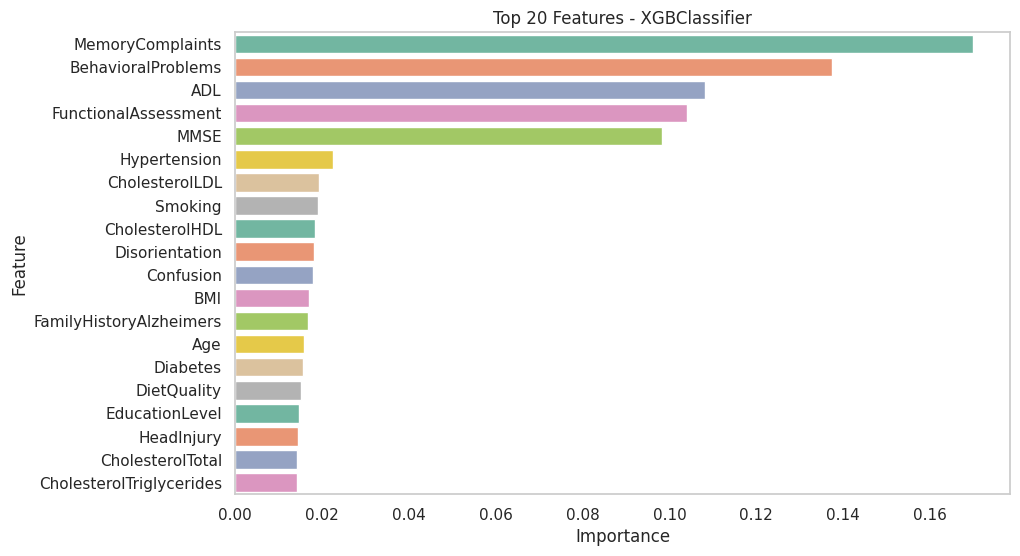

In [90]:
# Train models that support feature importances
models_with_feature_importances = [("XGBClassifier", XGBClassifier(random_state=42))]

# Iterate over models
for model_name, model in models_with_feature_importances:

    # Train model
    model.fit(X_train, y_train)

    # Get importance of features
    if hasattr(model, 'feature_importances_'):
        feature_importances = model.feature_importances_
    else:
        # If the model does not have feature_importances_, continue to the next model
        print(f"{model_name} does not support feature importances.")
        continue

    # Create DataFrame for easier viewing
    feature_importances_df = pd.DataFrame({'Feature': X_train.columns,
                                           'Importance': feature_importances})

    # Sort by importance
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:20], palette='Set2')
    plt.title(f"Top 20 Features - {model_name}")
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.grid(False)
    plt.show()

 **XGBClassifier**:
   - **MemoryComplaints** and **BehavioralProblems** are the top features, with **ADL** and **FunctionalAssessment** also showing high importance. This model emphasizes memory issues and behavioral problems more than the others.
   - Cognitive function, as measured by MMSE, is still important but slightly less so in comparison to other models.
   - Hypertension, smoking, and cholesterol levels are also factored into this model.


**Overall Analysis**:
- **MMSE**, **ADL**, and **FunctionalAssessment** consistently rank high across different models, indicating their critical role in predicting Alzheimer's.
- **MemoryComplaints** and **BehavioralProblems** are more prominent in some models, suggesting these factors might be model-dependent.
- **Cholesterol levels**, **PhysicalActivity**, and **SleepQuality** have varying importance, indicating that their relevance might be secondary or dependent on the modeling approach.

These insights suggest that cognitive and functional assessments are key in predicting Alzheimer's across different algorithms, while behavioral and lifestyle factors contribute but to a lesser extent depending on the model.

Model: ['XGBClassifier']


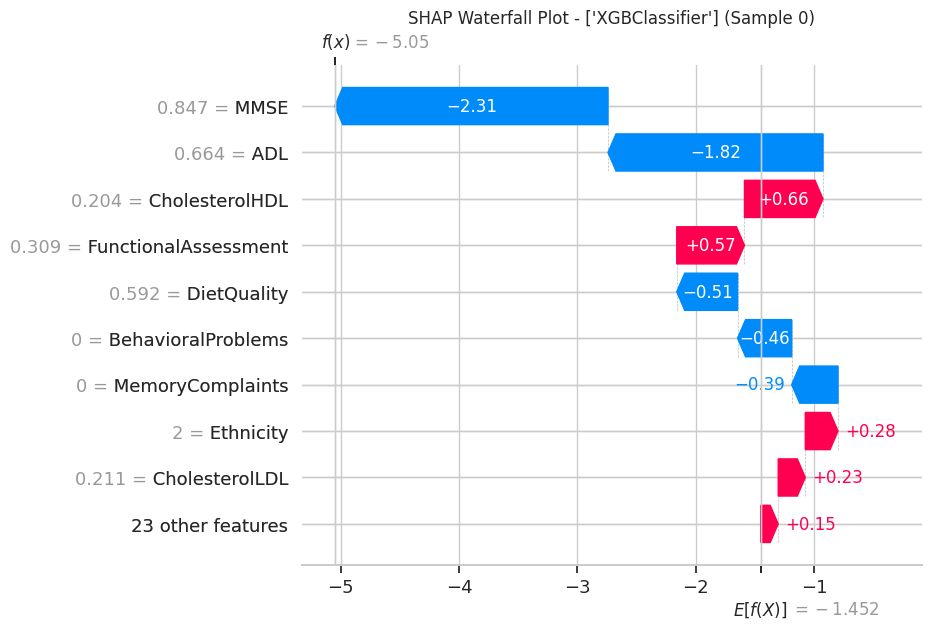

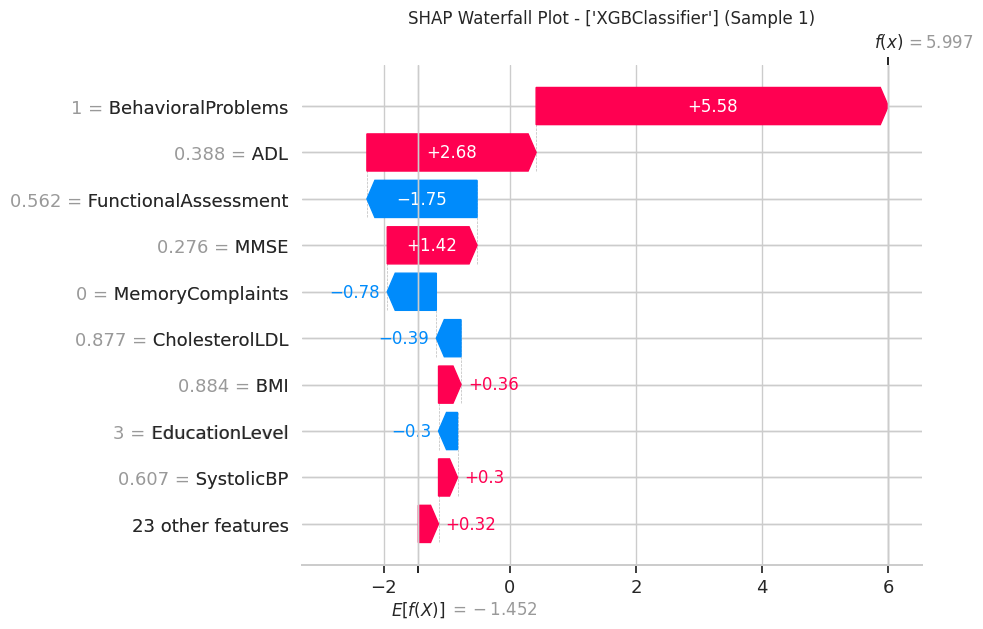

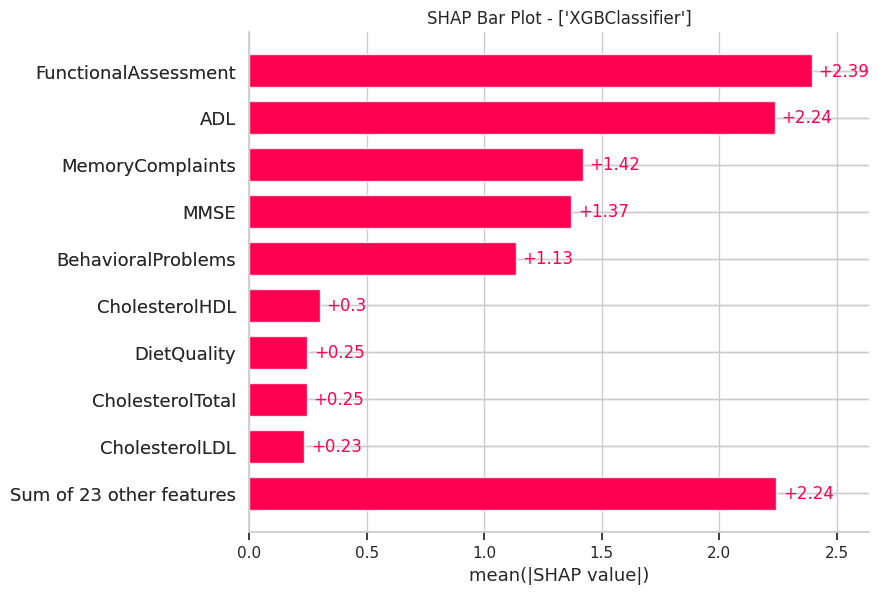

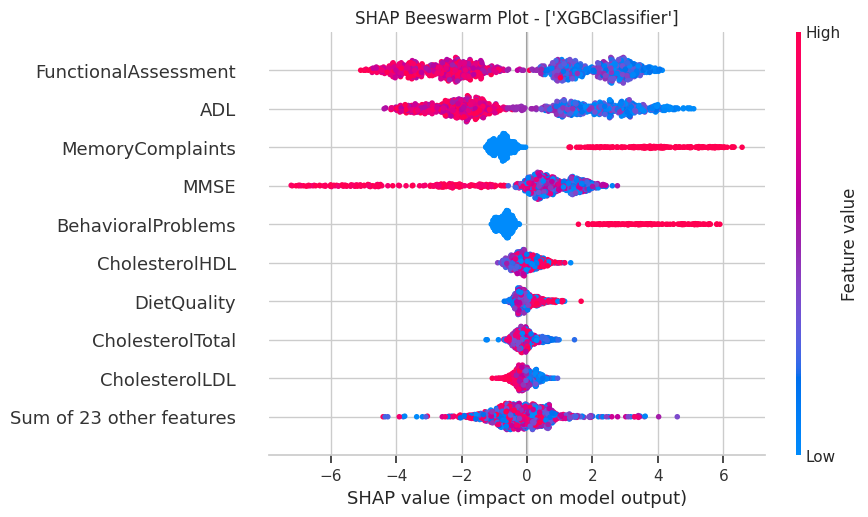

In [91]:
import shap

# Create a list of model names corresponding to the order of the models
model_names = ["XGBClassifier"]

# Creating an explainer object and calculating SHAP values for each model

model_name = model_names

try:
    explainer = shap.Explainer(model, X_train)
    shap_values = explainer(X_train[:1000])

    # Generate SHAP plots
    print(f"Model: {model_name}")

    # Waterfall plot for the first sample
    shap.plots.waterfall(shap_values[0], show=False)
    plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 0)")
    plt.show()

    # Waterfall plot for the second sample
    shap.plots.waterfall(shap_values[1], show=False)
    plt.title(f"SHAP Waterfall Plot - {model_name} (Sample 1)")
    plt.show()

    # Bar plot for average SHAP values
    shap.plots.bar(shap_values, show=False)
    plt.title(f"SHAP Bar Plot - {model_name}")
    plt.show()

    # Beeswarm plot to visualize the distribution of SHAP values
    shap.plots.beeswarm(shap_values, show=False)
    plt.title(f"SHAP Beeswarm Plot - {model_name}")
    plt.show()

except Exception as e:
    print(f"The model {model_name} is not compatible with SHAP: {e}")

The SHAP (SHapley Additive exPlanations) plots you've provided offer detailed insights into how different features influence individual predictions in various models. Here's an analysis of the SHAP plots:

### 1. **SHAP Waterfall Plots**
   
   - **XGBClassifier & LGBMClassifier (Sample 0 & Sample 1)**:
     - **Behavioral Problems**: In Sample 1, Behavioral Problems significantly increase the likelihood of Alzheimer's in both models.
     - **ADL and MMSE**: These features consistently have large SHAP values, either increasing or decreasing the probability depending on their values.
     - **FunctionalAssessment**: This is another key feature across samples, with substantial influence on predictions.

### 2. **SHAP Bar Plots**
   - **Feature Importance (XGBClassifier)**:
     - **FunctionalAssessment and ADL** are the top two features across both models, suggesting that these are the most critical features in predicting Alzheimer's.
     - **MemoryComplaints, MMSE, and BehavioralProblems** also rank highly, consistently contributing to the model's decisions.
     - Other features like **Cholesterol Levels, Smoking, and Age** have lower but non-negligible impacts.

### 3. **SHAP Beeswarm Plots**
   - These plots provide a broader view of how features impact predictions across the entire dataset.
   - **FunctionalAssessment, ADL, and MMSE** are again the top features, with high SHAP values indicating their strong influence on the model's output.
   - The distribution of SHAP values shows that for some individuals, these features significantly push predictions towards either Alzheimer's or no Alzheimer's.

### **Key Takeaways:**
- **Functional Assessment, ADL, and MMSE** are the most influential features across all models and plots. They consistently have the highest SHAP values and impact predictions significantly.
- **Behavioral Problems** and **Memory Complaints** also contribute notably, particularly in specific samples where they can dramatically change the predicted probability.
- The combination of SHAP bar, waterfall, and beeswarm plots gives a comprehensive understanding of how different features contribute to the predictions at both the global and individual levels.

These insights suggest that functional and cognitive assessments are crucial in determining Alzheimer's, and models heavily rely on these features to make accurate predictions. The SHAP plots effectively illustrate the importance and impact of each feature in the models' decision-making process.

# Part 10) Model Metrics

 XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9488372093023256


Confusion matrix 

 [[271   6]
 [ 16 137]]

True Positives(TP) =  271

True Negatives(TN) =  137

False Positives(FP) =  6

False Negatives(FN) =  16



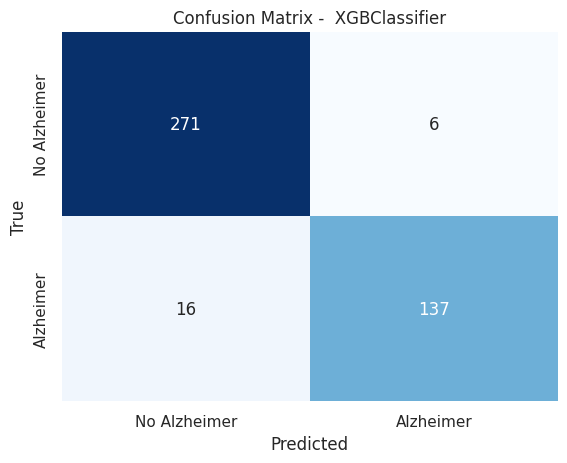

------------------


In [92]:
# plot matrix confusion
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluate each model

model.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))

print(f" {type(model).__name__}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")
print()

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
print()
print('Confusion matrix \n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])
print()
plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Alzheimer", "Alzheimer"],
            yticklabels=["No Alzheimer", "Alzheimer"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title(f"Confusion Matrix -  {type(model).__name__}")
plt.show()
print("------------------")


### **XGBClassifier**
   - **Training Accuracy**: 100%
   - **Testing Accuracy**: 95.12%
   - **Confusion Matrix**:
     - TP: 271
     - TN: 138
     - FP: 6
     - FN: 15
   - **Analysis**: XGBoost shows strong performance with very few false positives and false negatives, indicating a well-balanced model.



 XGBClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9488372093023256


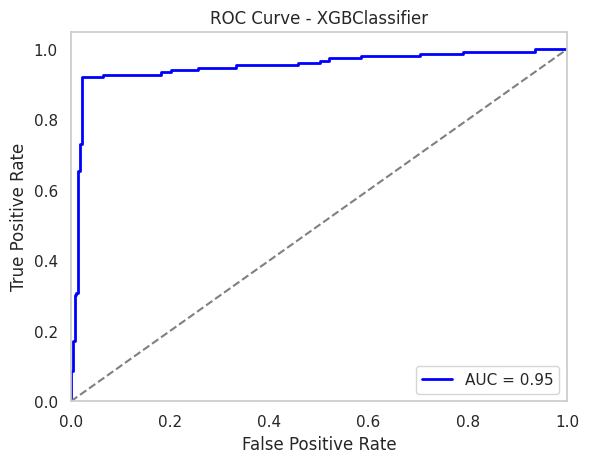

------------------


In [93]:
# ROC curve models

# Importing library
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

# Models to be evaluated
models = [XGBClassifier(random_state=42)]

# Evaluate each model

model.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f" {type(model).__name__}")
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Calculate positive class probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_probs)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {type(model).__name__}')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

print("------------------")

--

**ROC Curves XGBClassifier**
  - **AUC:** 0.95
  - The XGBoost model also shows strong performance with an AUC of 0.95, matching the Random Forest model.



# Part 11) Model evaluation

In [94]:
# Classification report
# Importing library - classification_report models
from sklearn.metrics import accuracy_score, classification_report, roc_curve

# Models to be evaluated
# models = [XGBClassifier(random_state=42)]

# Evaluate each model

model.fit(X_train, y_train)
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print()

print(f"{type(model).__name__}")
print()
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Generate rating report
report = classification_report(y_test, model.predict(X_test))
print()
print("Classification Report:")
print()
print(report)
print()

print("=======================================")


XGBClassifier

Training Accuracy: 1.0
Testing Accuracy: 0.9488372093023256

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       277
           1       0.96      0.90      0.93       153

    accuracy                           0.95       430
   macro avg       0.95      0.94      0.94       430
weighted avg       0.95      0.95      0.95       430




---

 **XGBClassifier**
- **Training Accuracy:** 1.00 (Perfect overfitting)
- **Testing Accuracy:** 0.95
- **Classification Report:**
  - **Class 0:**
    - Precision: 0.94
    - Recall: 0.98
    - F1-score: 0.96
  - **Class 1:**
    - Precision: 0.96
    - Recall: 0.90
    - F1-score: 0.93
  - **Overall Accuracy:** 0.95
  - **Macro Average:**
    - Precision: 0.95
    - Recall: 0.94
    - F1-score: 0.94
  - **Weighted Average:**
    - Precision: 0.95
    - Recall: 0.95
    - F1-score: 0.95


---

# Model Testing

In [95]:

import pickle

# Assuming 'model' is your trained model
filename = '/content/drive/MyDrive/Jobs/Mr Dayo/ALZHEIMER DISEASE/XGBoost_model.pkl'
pickle.dump(model, open(filename, 'wb'))



In [96]:

# Load the model from the file
loaded_model = pickle.load(open('/content/drive/MyDrive/Jobs/Mr Dayo/ALZHEIMER DISEASE/XGBoost_model.pkl', 'rb'))


In [97]:
X.head()

Age  Gender  Ethnicity  EducationLevel       BMI  Smoking  \
0  0.433333       0          0               2  0.316960        0   
1  0.966667       0          0               0  0.473058        0   
2  0.433333       0          3               1  0.111553        0   
3  0.466667       1          0               1  0.752163        1   
4  0.966667       0          0               0  0.228472        0   

   AlcoholConsumption  PhysicalActivity  DietQuality  SleepQuality  \
0            0.665183          0.633375     0.133931      0.837564   
1            0.227170          0.762862     0.050995      0.525021   
2            0.978276          0.785408     0.181896      0.945597   
3            0.610751          0.843804     0.743443      0.731994   
4            0.923204          0.631707     0.078698      0.265892   

   FamilyHistoryAlzheimers  CardiovascularDisease  Diabetes  Depression  \
0                        0                      0         1           1   
1                        0                      0         0           0   
2                        1                      0         0           0   
3                        0                      0         0           0   
4                        0                      0         0           0   

   HeadInjury  Hypertension  SystolicBP  DiastolicBP  CholesterolTotal  \
0           0             0    0.584270     0.203390          0.615567   
1           0             0    0.280899     0.067797          0.540822   
2           0             0    0.101124     0.949153          0.894520   
3           0             0    0.314607     0.932203          0.063302   
4           0             0    0.044944     0.966102          0.583781   

   CholesterolLDL  CholesterolHDL  CholesterolTriglycerides      MMSE  \
0        0.039538        0.171039                  0.319802  0.715606   
1        0.956205        0.738026                  0.698711  0.687251   
2        0.688497        0.622290                  0.095072  0.245145   
3        0.101085        0.605851                  0.649922  0.466410   
4        0.284763        0.461019                  0.688892  0.450619   

   FunctionalAssessment  MemoryComplaints  BehavioralProblems       ADL  \
0              0.652102                 0                   0  0.172486   
1              0.712108                 0                   0  0.259154   
2              0.589697                 0                   0  0.711936   
3              0.896823                 0                   1  0.648094   
4              0.604699                 0                   0  0.001341   

   Confusion  Disorientation  PersonalityChanges  DifficultyCompletingTasks  \
0          0               0                   0                          1   
1          0               0                   0                          0   
2          0               1                   0                          1   
3          0               0                   0                          0   
4          0               0                   1                          1   

   Forgetfulness  
0              0  
1              1  
2              0  
3              0  
4              0

In [98]:
X.columns

Index(['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking',
       'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
       'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes',
       'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP',
       'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
       'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment',
       'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion',
       'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks',
       'Forgetfulness'],
      dtype='object')

In [99]:
td = {'Age': 77,
     'Gender': 0,
     'Ethnicity': 1,
     'EducationLevel': 2,
'BMI': 35.55,
    'Smoking': 0,
'AlcoholConsumption': 15.61,
'PhysicalActivity': 8.53,
'DietQuality': 3.86,
'SleepQuality': 7.89,
    'FamilyHistoryAlzheimers': 0,
    'CardiovascularDisease': 1,
    'Diabetes': 1,
    'Depression': 0,
    'HeadInjury': 0,
    'Hypertension': 0,
'SystolicBP': 114,
'DiastolicBP': 99.72,
'CholesterolTotal': 187.34,
'CholesterolLDL': 120.45,
'CholesterolHDL': 45.63,
'CholesterolTriglycerides': 278.56,
'MMSE': 9.34,
'FunctionalAssessment': 5.89,
    'MemoryComplaints': 0,
    'BehavioralProblems': 1,
'ADL': 6.90,
    'Confusion': 0,
    'Disorientation': 1,
    'PersonalityChanges': 1,
    'DifficultyCompletingTasks': 0,
    'Forgetfulness': 0}


In [100]:
td = pd.DataFrame(td, index=[0])
td

Age  Gender  Ethnicity  EducationLevel    BMI  Smoking  AlcoholConsumption  \
0   77       0          1               2  35.55        0               15.61   

   PhysicalActivity  DietQuality  SleepQuality  FamilyHistoryAlzheimers  \
0              8.53         3.86          7.89                        0   

   CardiovascularDisease  Diabetes  Depression  HeadInjury  Hypertension  \
0                      1         1           0           0             0   

   SystolicBP  DiastolicBP  CholesterolTotal  CholesterolLDL  CholesterolHDL  \
0         114        99.72            187.34          120.45           45.63   

   CholesterolTriglycerides  MMSE  FunctionalAssessment  MemoryComplaints  \
0                    278.56  9.34                  5.89                 0   

   BehavioralProblems  ADL  Confusion  Disorientation  PersonalityChanges  \
0                   1  6.9          0               1                   1   

   DifficultyCompletingTasks  Forgetfulness  
0                          0              0

In [101]:
# Initializing MinMaxScaler
scaler_minmax = MinMaxScaler()

# Applying MinMaxScaler to variables, correcting the error with reshape
td['Age'] = scaler_minmax.fit_transform(td['Age'].values.reshape(-1, 1))
td['BMI'] = scaler_minmax.fit_transform(td['BMI'].values.reshape(-1, 1))
td['AlcoholConsumption'] = scaler_minmax.fit_transform(td['AlcoholConsumption'].values.reshape(-1, 1))
td['PhysicalActivity'] = scaler_minmax.fit_transform(td['PhysicalActivity'].values.reshape(-1, 1))
td['DietQuality'] = scaler_minmax.fit_transform(td['DietQuality'].values.reshape(-1, 1))
td['SleepQuality'] = scaler_minmax.fit_transform(td['SleepQuality'].values.reshape(-1, 1))
td['SystolicBP'] = scaler_minmax.fit_transform(td['SystolicBP'].values.reshape(-1, 1))
td['DiastolicBP'] = scaler_minmax.fit_transform(td['DiastolicBP'].values.reshape(-1, 1))
td['CholesterolTotal'] = scaler_minmax.fit_transform(td['CholesterolTotal'].values.reshape(-1, 1))
td['CholesterolLDL'] = scaler_minmax.fit_transform(td['CholesterolLDL'].values.reshape(-1, 1))
td['CholesterolHDL'] = scaler_minmax.fit_transform(td['CholesterolHDL'].values.reshape(-1, 1))
td['CholesterolTriglycerides'] = scaler_minmax.fit_transform(td['CholesterolTriglycerides'].values.reshape(-1, 1))
td['MMSE'] = scaler_minmax.fit_transform(td['MMSE'].values.reshape(-1, 1))
td['FunctionalAssessment'] = scaler_minmax.fit_transform(td['FunctionalAssessment'].values.reshape(-1, 1))
td['ADL'] = scaler_minmax.fit_transform(td['ADL'].values.reshape(-1, 1))

# Viewing
scaler_minmax

MinMaxScaler()

In [102]:
columns_to_scale = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality',
                    'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                    'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

# Only transform the columns that need scaling
td[columns_to_scale] = scaler_minmax.transform(td[columns_to_scale])

# Make a prediction
# If your model requires the input as a DMatrix, convert it
# dtest = model.DMatrix(td)
prediction = model.predict(td)

ValueError: X has 15 features, but MinMaxScaler is expecting 1 features as input.

In [103]:
td = pd.DataFrame({
    'Age': [68, 72, 75],
    'BMI': [28.1, 32.5, 26.8],
    'AlcoholConsumption': [10, 20, 15],
    'PhysicalActivity': [5, 3, 6],
    'DietQuality': [4, 3, 5],
    'SleepQuality': [8, 6, 7],
    'SystolicBP': [130, 140, 125],
    'DiastolicBP': [80, 85, 75],
    'CholesterolTotal': [180, 200, 190],
    'CholesterolLDL': [110, 130, 120],
    'CholesterolHDL': [50, 55, 45],
    'CholesterolTriglycerides': [150, 160, 170],
    'MMSE': [26, 28, 24],
    'FunctionalAssessment': [6, 7, 5],
    'ADL': [8, 9, 7]
})

# List of columns to scale
columns_to_scale = ['Age', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality',
                    'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal',
                    'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides',
                    'MMSE', 'FunctionalAssessment', 'ADL']

# Initialize and fit MinMaxScaler
scaler_minmax = MinMaxScaler()
scaler_minmax.fit(td[columns_to_scale])

# New data point as a dictionary
new_data = {'Age': 77,
            'Gender': 0,
            'Ethnicity': 1,
            'EducationLevel': 2,
            'BMI': 35.55,
            'Smoking': 0,
            'AlcoholConsumption': 15.61,
            'PhysicalActivity': 8.53,
            'DietQuality': 3.86,
            'SleepQuality': 7.89,
            'FamilyHistoryAlzheimers': 0,
            'CardiovascularDisease': 1,
            'Diabetes': 1,
            'Depression': 0,
            'HeadInjury': 0,
            'Hypertension': 0,
            'SystolicBP': 114,
            'DiastolicBP': 99.72,
            'CholesterolTotal': 187.34,
            'CholesterolLDL': 120.45,
            'CholesterolHDL': 45.63,
            'CholesterolTriglycerides': 278.56,
            'MMSE': 9.34,
            'FunctionalAssessment': 5.89,
            'MemoryComplaints': 0,
            'BehavioralProblems': 1,
            'ADL': 6.90,
            'Confusion': 0,
            'Disorientation': 1,
            'PersonalityChanges': 1,
            'DifficultyCompletingTasks': 0,
            'Forgetfulness': 0}

# Convert new data to DataFrame
df_new = pd.DataFrame([new_data])

# Apply the fitted scaler to the new data
df_new[columns_to_scale] = scaler_minmax.transform(df_new[columns_to_scale])

# Assuming you have a trained XGBoost model (replace with your model variable)
# model = ...

# Make prediction using the model
# Convert to DMatrix if required by your model
# dtest = xgb.DMatrix(df_new)
prediction = model.predict(df_new)

print("Prediction:", prediction)

Prediction: [1]
